In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "life-expectancy-averaged-dataset"

# **Import**

In [2]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)


Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘psych’




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/life-expectancy-averaged-dataset/Life-Expectancy-Data-Averaged.csv')

**Data Description**   
* **https://www.kaggle.com/datasets/shreyasg23/life-expectancy-averaged-dataset**

1. **Country** (object): Name of the country.  
2. **Region** (object): Geographic region of the country.  
3. **Year** (float64): Year of the data (averaged or interpolated).  
4. **Infant_deaths** (float64): Number of infant deaths per 1000 live births.  
5. **Under_five_deaths** (float64): Number of deaths of children under five per 1000 live births.  
6. **Adult_mortality** (float64): Adult mortality rate per 1000 population.  
7. **Alcohol_consumption** (float64): Per capita alcohol consumption in liters of pure alcohol.  
8. **Hepatitis_B** (float64): Percentage of immunization coverage for Hepatitis B.  
9. **Measles** (float64): Number of reported measles cases.  
10. **BMI** (float64): Average Body Mass Index of the population.  
11. **Polio** (float64): Percentage of immunization coverage for polio.  
12. **Diphtheria** (float64): Percentage of immunization coverage for diphtheria.  
13. **Incidents_HIV** (float64): Number of new HIV infections per 1000 uninfected population.  
14. **GDP_per_capita** (float64): Gross Domestic Product per capita in USD.  
15. **Population_mln** (float64): Population size in millions.  
16. **Thinness_ten_nineteen_years** (float64): Prevalence of thinness (BMI < 18.5) among adolescents aged 10-19.  
17. **Thinness_five_nine_years** (float64): Prevalence of thinness (BMI < 18.5) among children aged 5-9.  
18. **Schooling** (float64): Average years of schooling.  
19. **Economy_status** (float64): Economic classification of the country (e.g., developing or developed).  
20. **Life_expectancy** (float64): Average life expectancy in years. 

In [4]:
str(df)

'data.frame':	179 obs. of  20 variables:
 $ Country                    : chr  "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ Region                     : chr  "Asia" "Rest of Europe" "Africa" "Africa" ...
 $ Year                       : num  2008 2008 2008 2008 2008 ...
 $ Infant_deaths              : num  71.08 15.26 26.76 88.77 9.47 ...
 $ Under_five_deaths          : num  98.6 17.1 31.2 144.2 11.5 ...
 $ Adult_mortality            : num  265.8 83.1 113.4 297.8 142.5 ...
 $ Alcohol_consumption        : num  0.0161 4.6969 0.4006 4.9356 7.755 ...
 $ Hepatitis_B                : num  64.6 98 88.3 68.8 98.2 ...
 $ Measles                    : num  24.4 95.9 93.2 64 75.4 ...
 $ BMI                        : num  22.5 25.9 24.9 22.5 25.9 ...
 $ Polio                      : num  55.4 98.1 91.8 35.8 96.9 ...
 $ Diphtheria                 : num  55.1 98.1 91.9 55.6 98.3 ...
 $ Incidents_HIV              : num  0.0225 0.0256 0.0219 1.3037 0.125 ...
 $ GDP_per_capita             : num  409 30

In [5]:
dim(df)

[1] 179  20

In [6]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Country*,1,179,9.000000e+01,5.181699e+01,90.000000,90.0000000,66.7170000,1.000000,179.00000,178.00000,0.0000000,-1.22012963,3.872983e+00
Region*,2,179,3.703911e+00,2.634374e+00,3.000000,3.4344828,2.9652000,1.000000,9.00000,8.00000,0.6982123,-0.80422497,1.969024e-01
Year,3,179,2.007500e+03,0.000000e+00,2007.500000,2007.5000000,0.0000000,2007.500000,2007.50000,0.00000,NaN,NaN,0.000000e+00
Infant_deaths,4,179,3.036379e+01,2.672548e+01,19.368750,26.9498276,20.8583287,2.381250,115.71875,113.33750,0.9662088,-0.08399823,1.997557e+00
Under_five_deaths,5,179,4.293827e+01,4.291695e+01,23.137500,36.2735345,25.0188750,3.000000,178.72500,175.72500,1.1752285,0.33961180,3.207764e+00
Adult_mortality,6,179,1.922518e+02,1.116590e+02,164.432406,177.2505866,97.6823983,57.710313,572.97431,515.26400,1.1888937,1.10083018,8.345789e+00
Alcohol_consumption,7,179,4.820882e+00,3.914554e+00,4.209375,4.5276267,4.7628525,0.000025,15.10000,15.09997,0.5089620,-0.91256560,2.925875e-01
Hepatitis_B,8,179,8.429260e+01,1.382022e+01,88.000000,86.4056034,10.3782000,30.687500,98.87500,68.18750,-1.5214378,2.22295132,1.032972e+00
Measles,9,179,7.734497e+01,1.731521e+01,83.000000,79.3047414,17.4205500,16.250000,99.00000,82.75000,-0.9802942,0.69356753,1.294199e+00


In [7]:
summary(df)

   Country             Region               Year      Infant_deaths    
 Length:179         Length:179         Min.   :2008   Min.   :  2.381  
 Class :character   Class :character   1st Qu.:2008   1st Qu.:  8.159  
 Mode  :character   Mode  :character   Median :2008   Median : 19.369  
                                       Mean   :2008   Mean   : 30.364  
                                       3rd Qu.:2008   3rd Qu.: 48.959  
                                       Max.   :2008   Max.   :115.719  
 Under_five_deaths Adult_mortality  Alcohol_consumption  Hepatitis_B   
 Min.   :  3.000   Min.   : 57.71   Min.   : 0.000025   Min.   :30.69  
 1st Qu.:  9.775   1st Qu.:107.05   1st Qu.: 1.317813   1st Qu.:78.22  
 Median : 23.137   Median :164.43   Median : 4.209375   Median :88.00  
 Mean   : 42.938   Mean   :192.25   Mean   : 4.820882   Mean   :84.29  
 3rd Qu.: 68.322   3rd Qu.:247.52   3rd Qu.: 7.843438   3rd Qu.:94.38  
 Max.   :178.725   Max.   :572.97   Max.   :15.100000   Max.   :

**Check missing value**

In [8]:
Na <- colSums(is.na(df))
data.frame(Na)

,Na
,<dbl>
Country,0
Region,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0


**Duplicate check**

In [9]:
sum(duplicated(df))

[1] 0

In [10]:
head(df)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Asia,2007.5,71.08125,98.61250,265.80497,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1,59.65625
2,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.13297,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1,75.95000
3,Algeria,Africa,2007.5,26.75625,31.19375,113.43928,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1,73.78750
4,Angola,Africa,2007.5,88.76875,144.16250,297.84406,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1,52.82500
5,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.47881,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1,75.35000
6,Argentina,South America,2007.5,13.85000,15.50625,127.91266,7.959375,85.3125,84.6875,26.85000,92.2500,92.3750,0.145625,12169.1250,39.913125,1.07500,0.95000,9.36875,1,74.86250


In [11]:
tail(df)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
174,Vanuatu,Oceania,2007.5,23.95000,28.61875,153.7148,1.159375,63.5625,65.0000,25.80000,71.5000,66.9375,0.170000,2735.625,0.223125,1.56875,1.49375,6.61875,1,68.71250
175,"Venezuela, RB",South America,2007.5,15.85000,18.50000,151.0562,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.875,27.392500,1.65000,1.56250,8.23750,1,72.79375
176,Vietnam,Asia,2007.5,19.50000,24.47500,133.0544,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.875,86.032500,14.92500,15.62500,6.90000,1,74.33125
177,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.6539,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.812,21.730625,13.83125,13.75000,2.22500,1,64.16250
178,Zambia,Africa,2007.5,60.58125,99.20625,452.7612,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.875,12.862500,6.88125,6.76250,6.43750,1,52.33125
179,Zimbabwe,Africa,2007.5,50.16875,85.32500,572.9743,2.900625,79.5625,64.0000,23.54375,79.5625,79.1250,8.006250,1290.625,12.538750,7.01250,6.98750,7.21250,1,48.66250


# **2. Data Transform for Visualization**

In [12]:
df$Year <- as.Date(df$Year)

In [13]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [14]:
for(i in 1:length(df)){
    if(is.character(df[,i]) == TRUE)
        df[,i] <- as.factor(df[,i])
}

In [15]:
cat_cols <- {}

for(i in 1:length(df)){
    if(is.factor(df[[i]]) == TRUE)
        cat_cols <- c(cat_cols ,colnames(df[i]))
}

**Data Check**

In [16]:
head(df)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
,<fct>,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Asia,1975-07-01,71.08125,98.61250,265.80497,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1,59.65625
2,Albania,Rest of Europe,1975-07-01,15.25625,17.14375,83.13297,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1,75.95000
3,Algeria,Africa,1975-07-01,26.75625,31.19375,113.43928,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1,73.78750
4,Angola,Africa,1975-07-01,88.76875,144.16250,297.84406,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1,52.82500
5,Antigua and Barbuda,Central America and Caribbean,1975-07-01,9.47500,11.51875,142.47881,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1,75.35000
6,Argentina,South America,1975-07-01,13.85000,15.50625,127.91266,7.959375,85.3125,84.6875,26.85000,92.2500,92.3750,0.145625,12169.1250,39.913125,1.07500,0.95000,9.36875,1,74.86250


# **3. Data Visulization**

## **Histogram & Boxplot**

In [17]:
options(repr.plot.width = 14.0, repr.plot.height = 7.0)

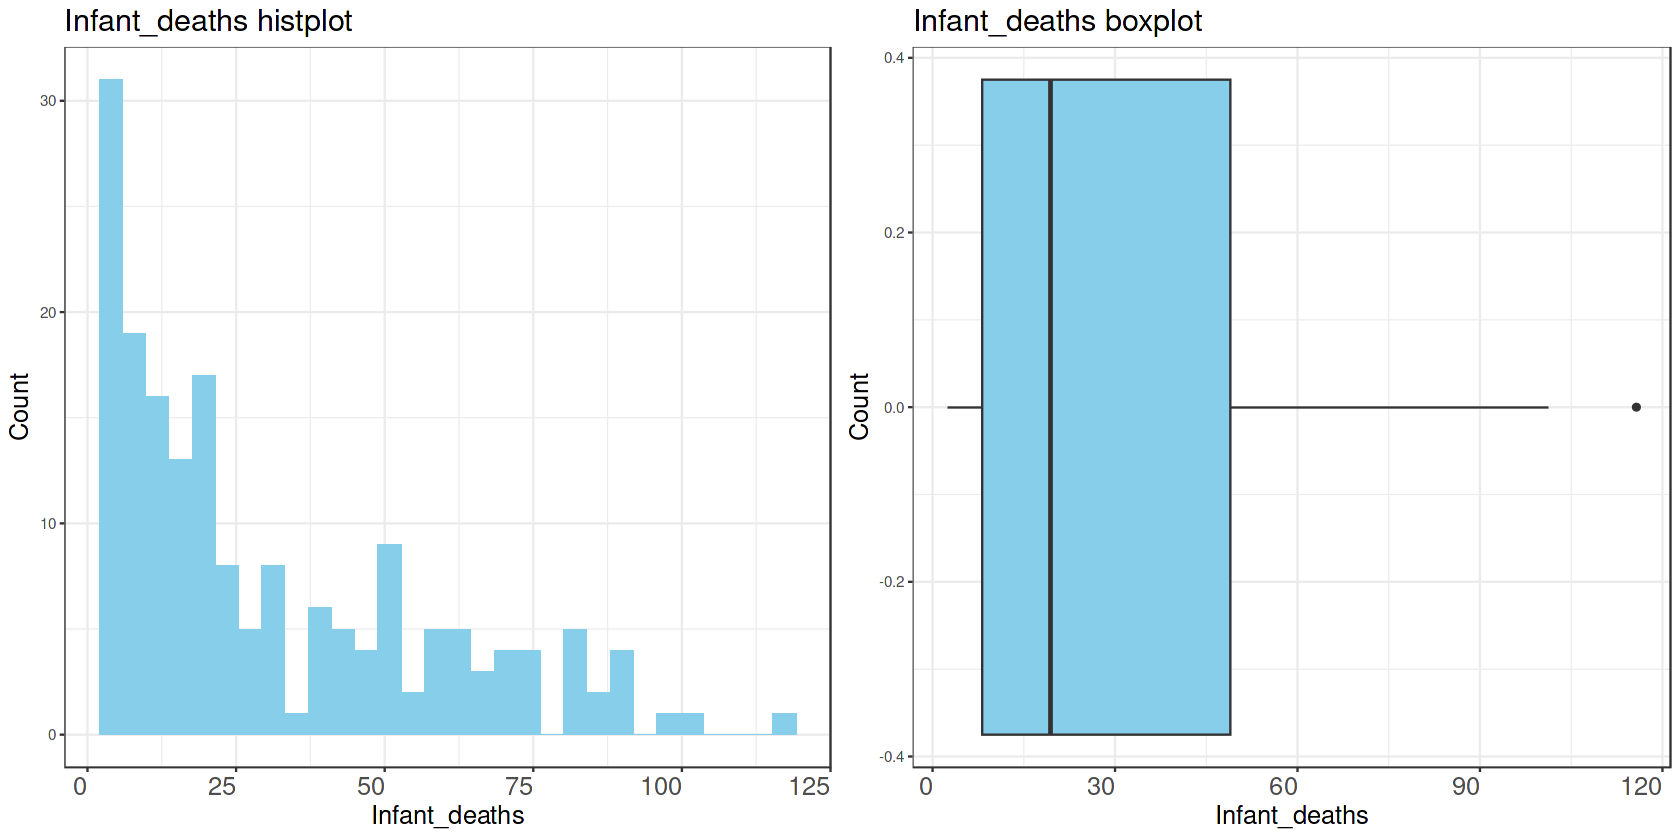

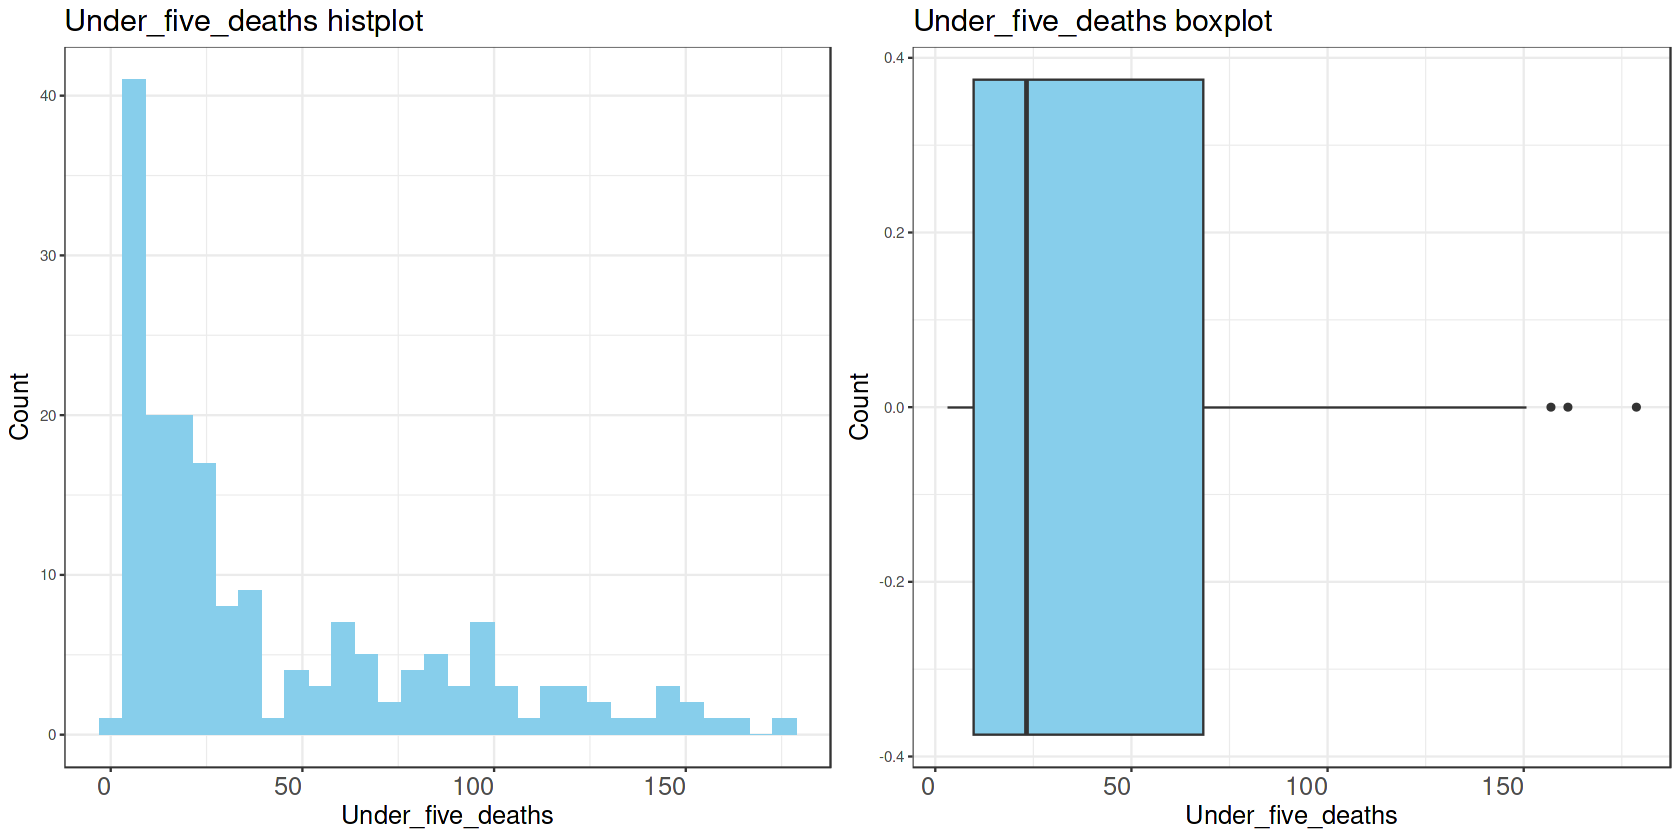

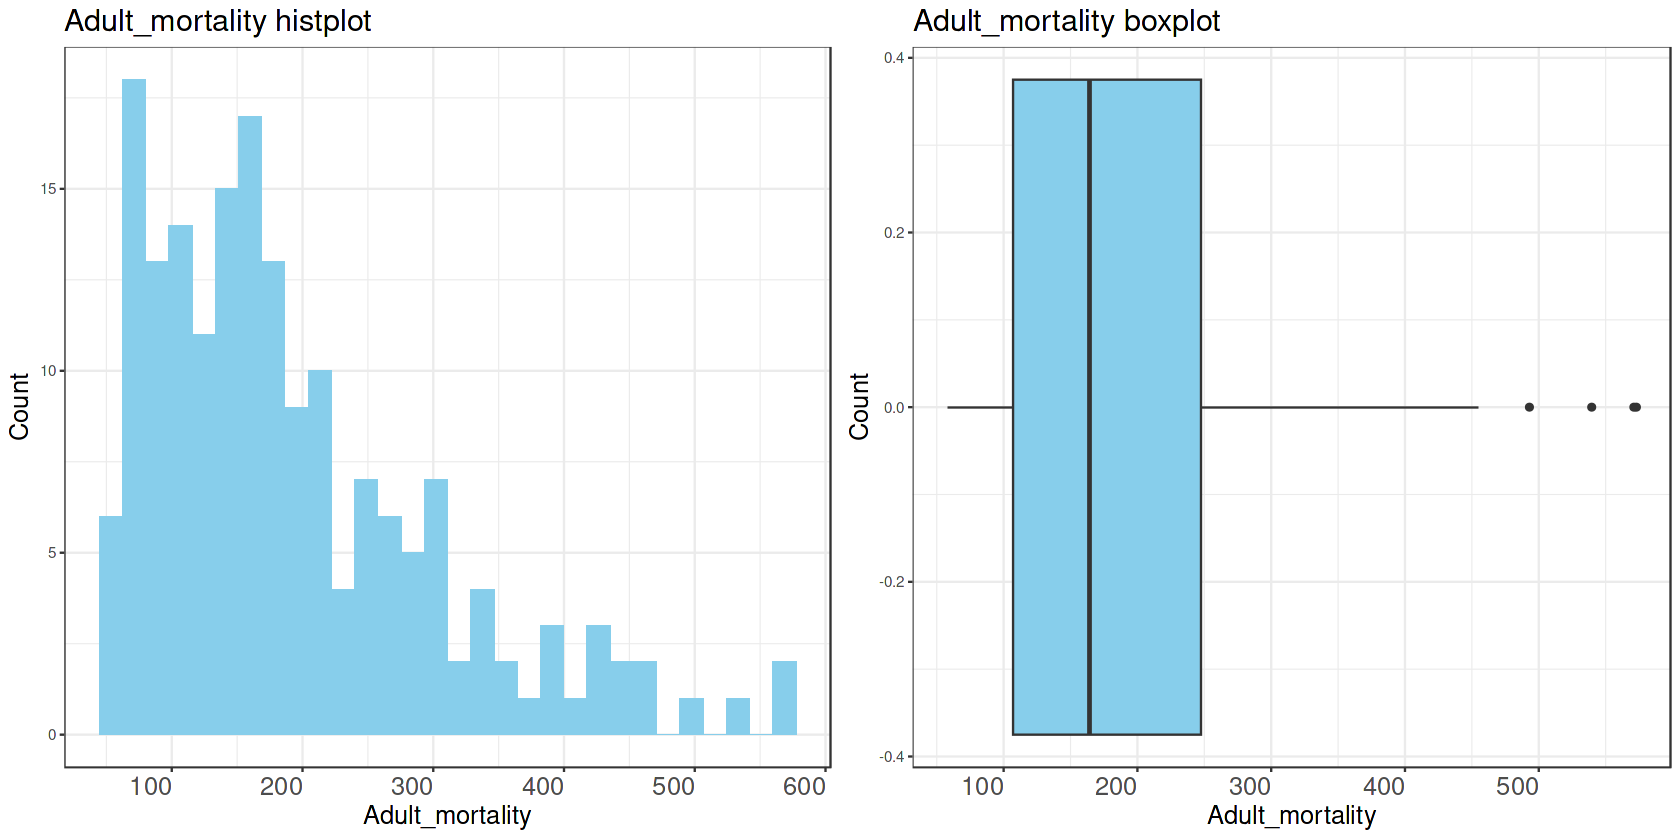

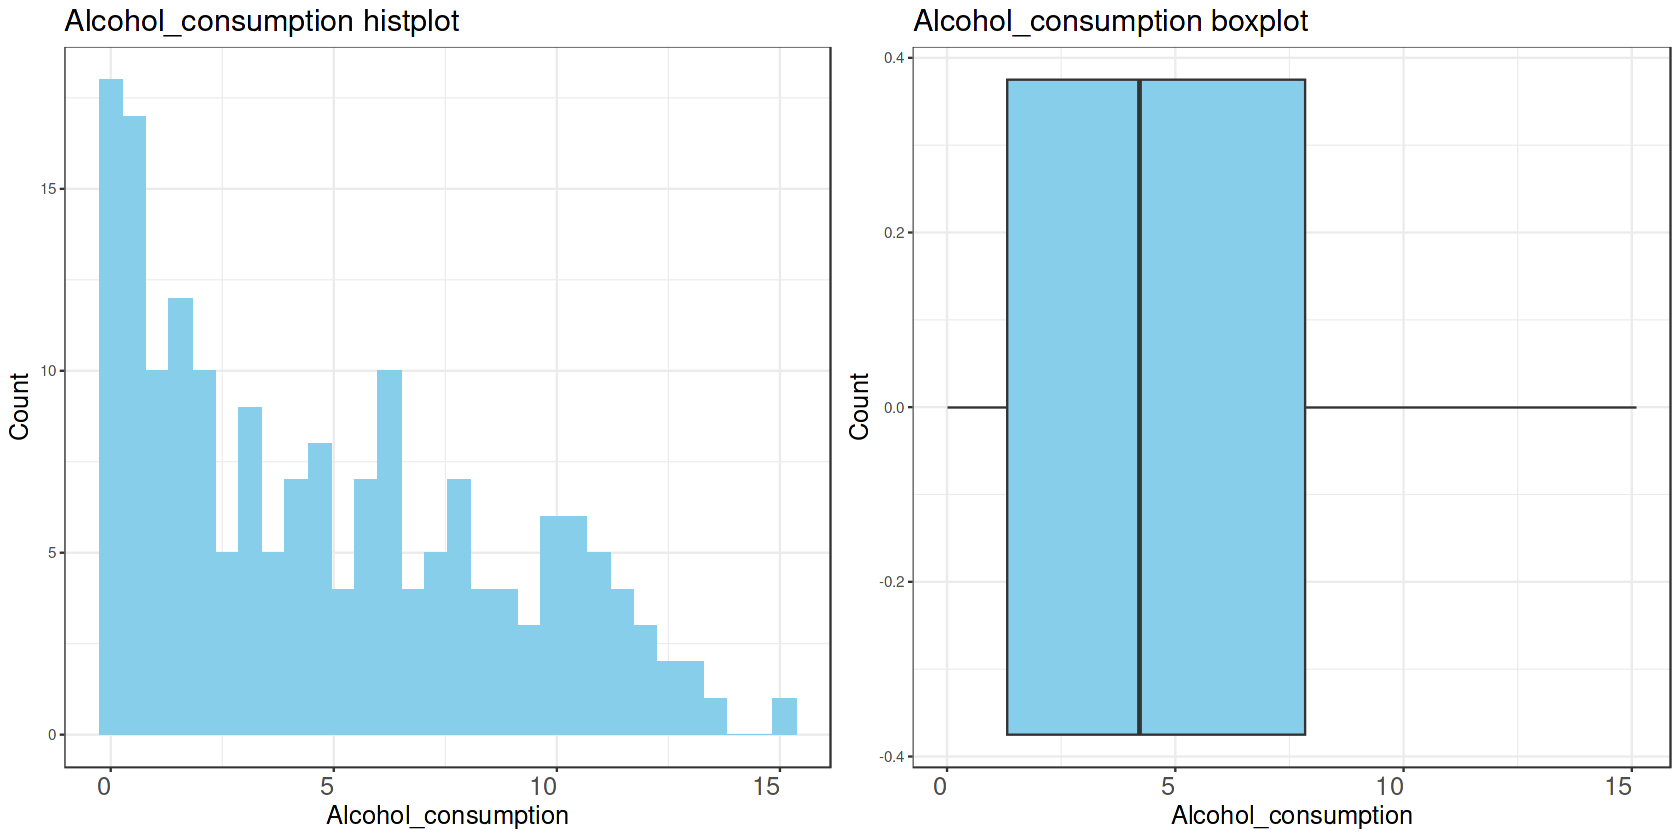

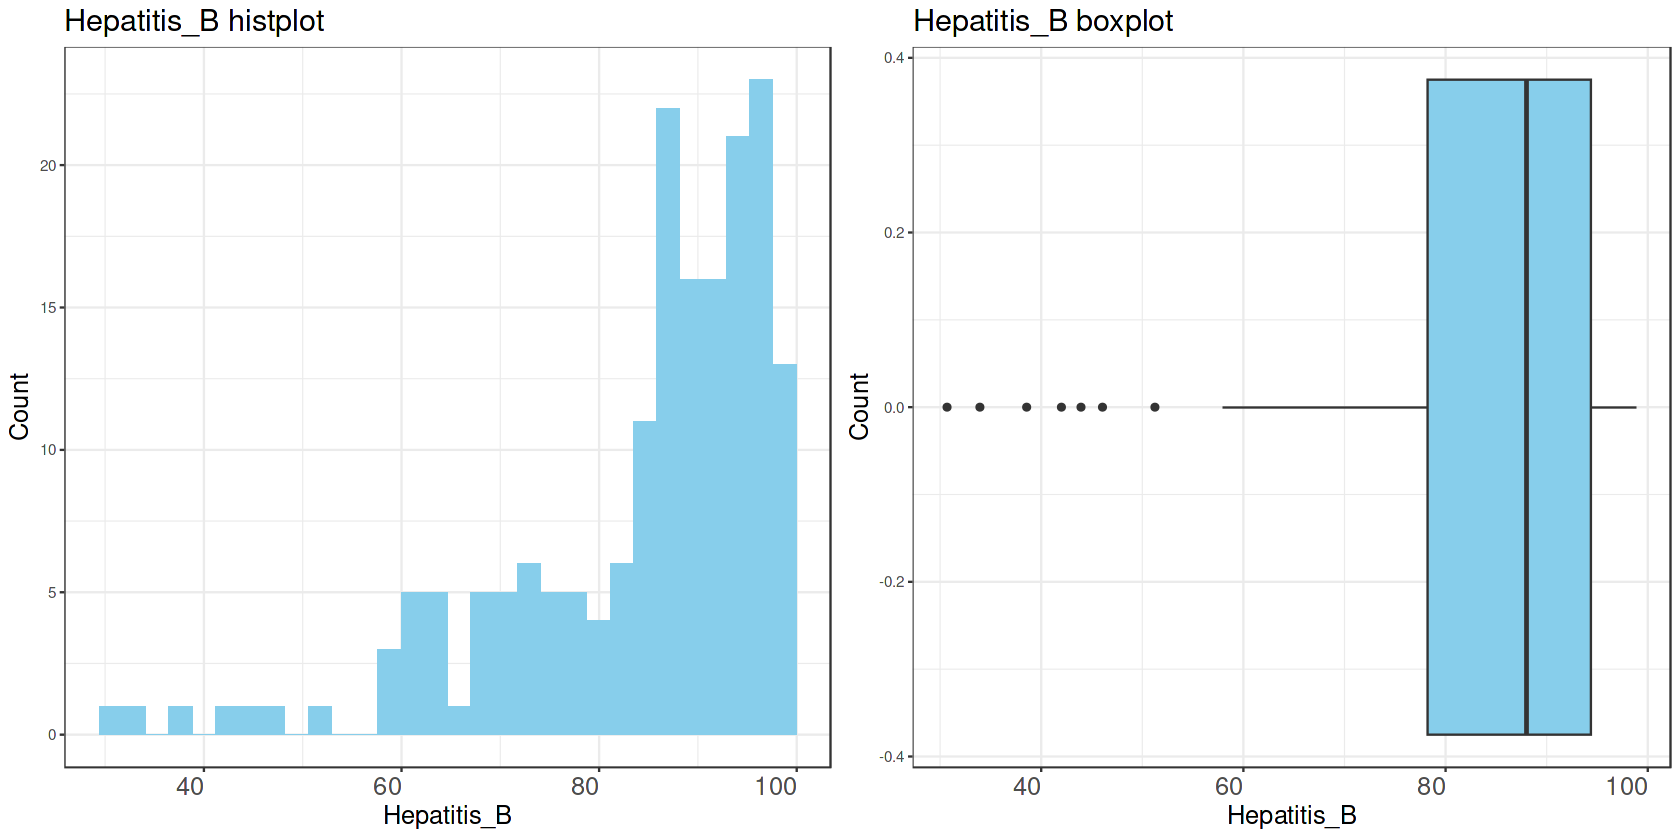

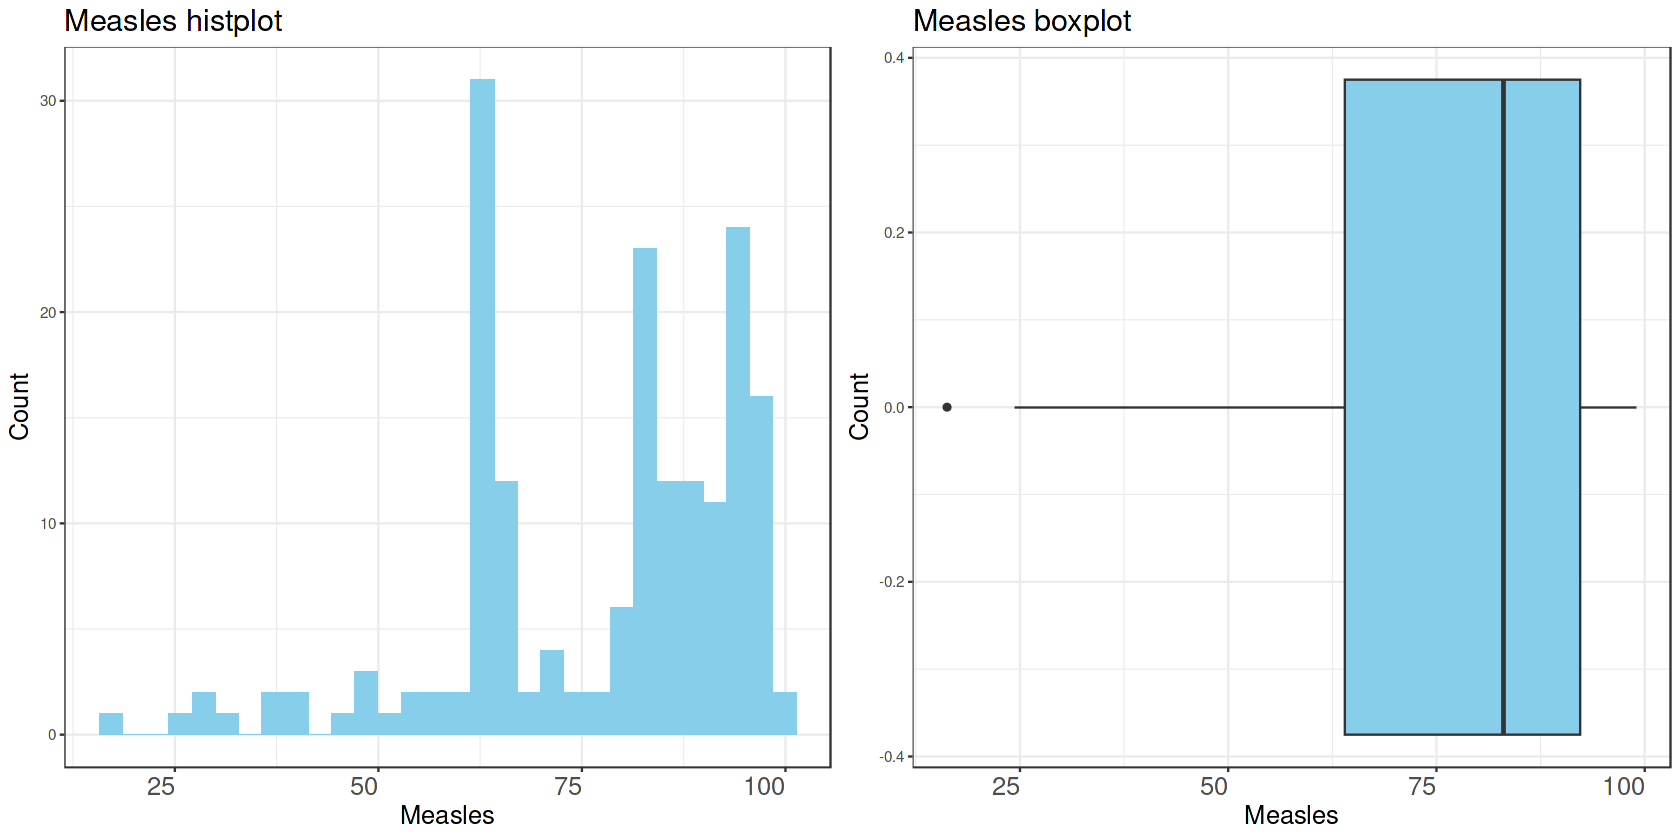

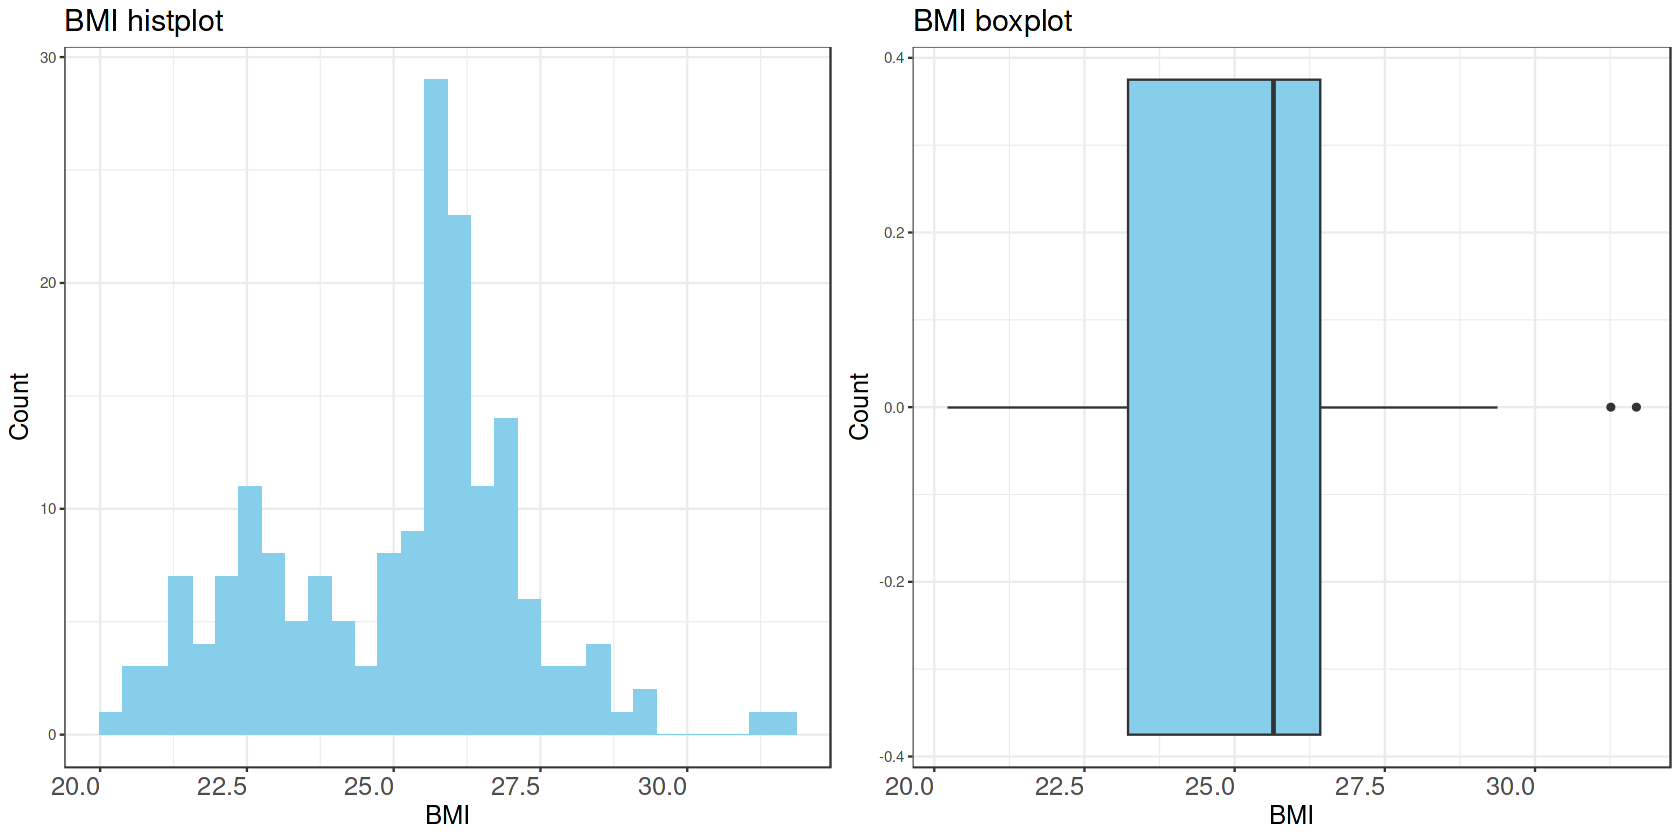

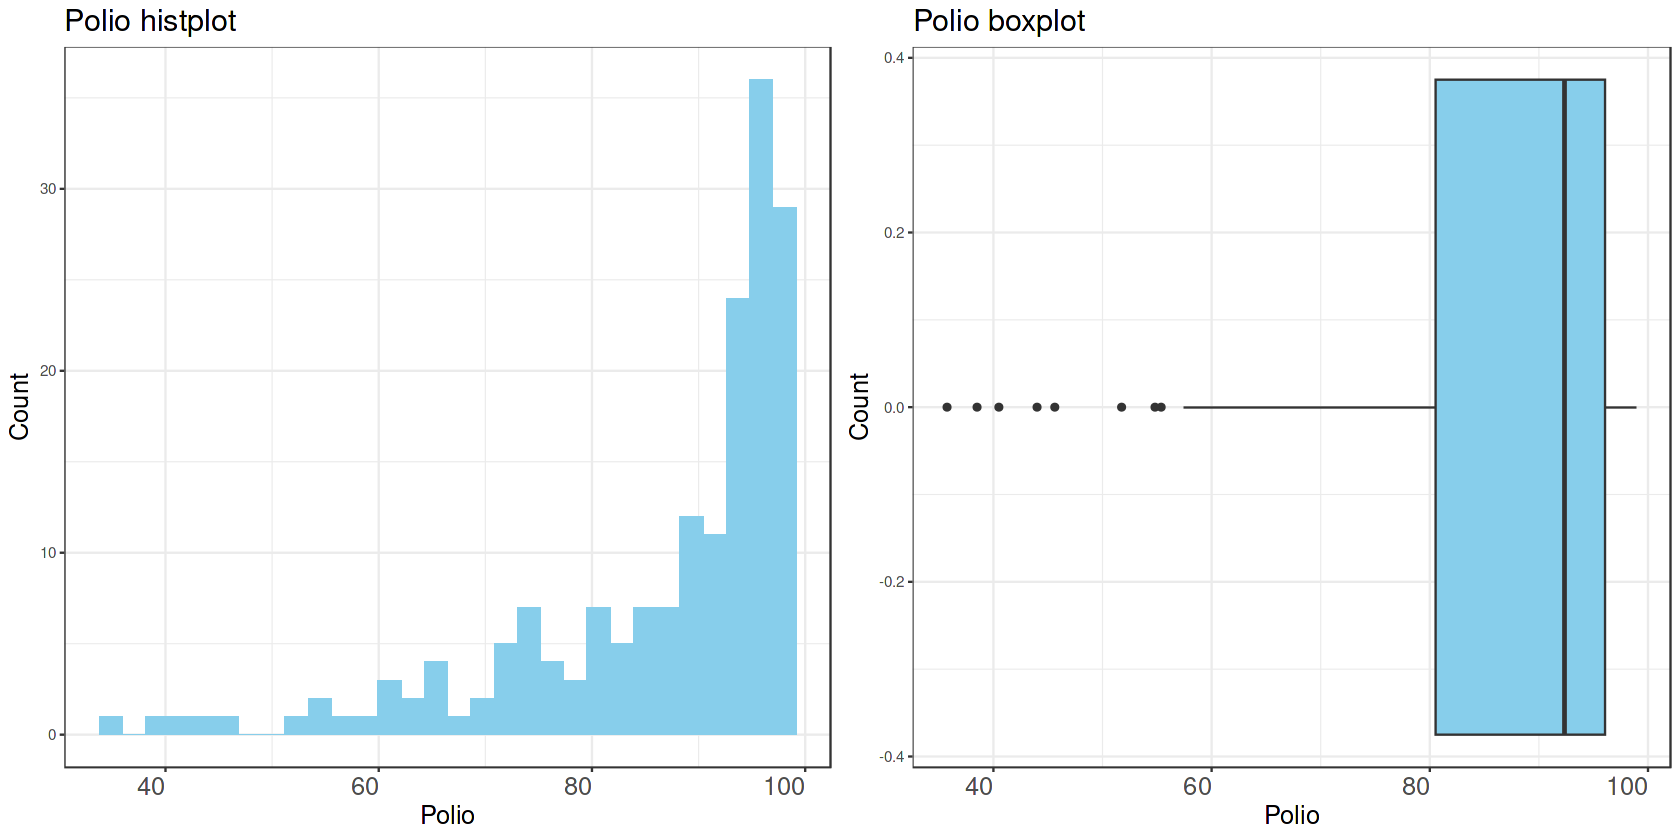

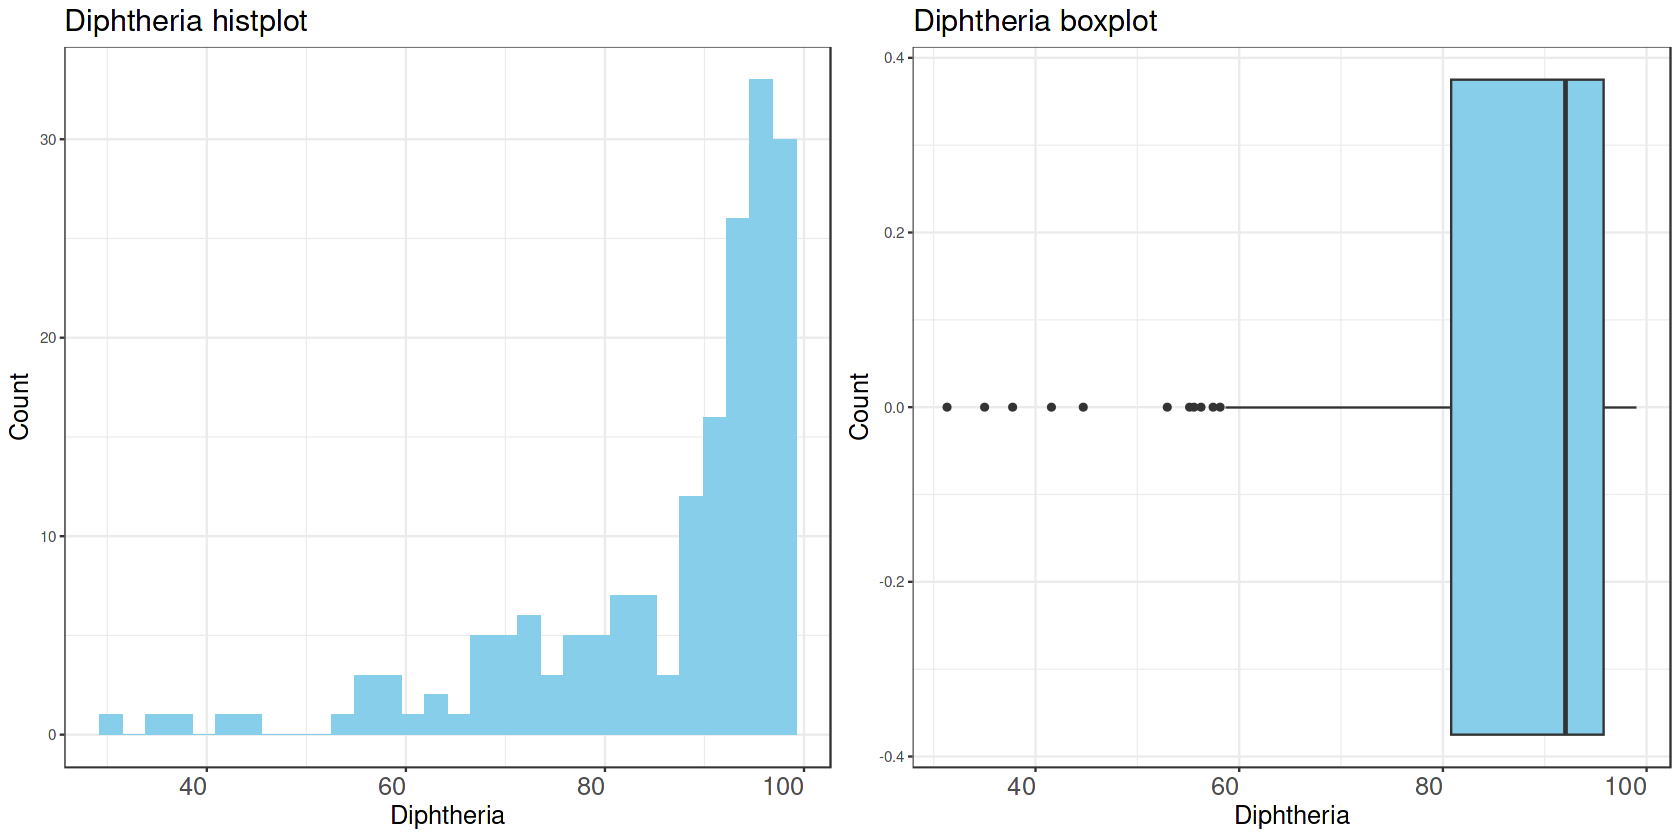

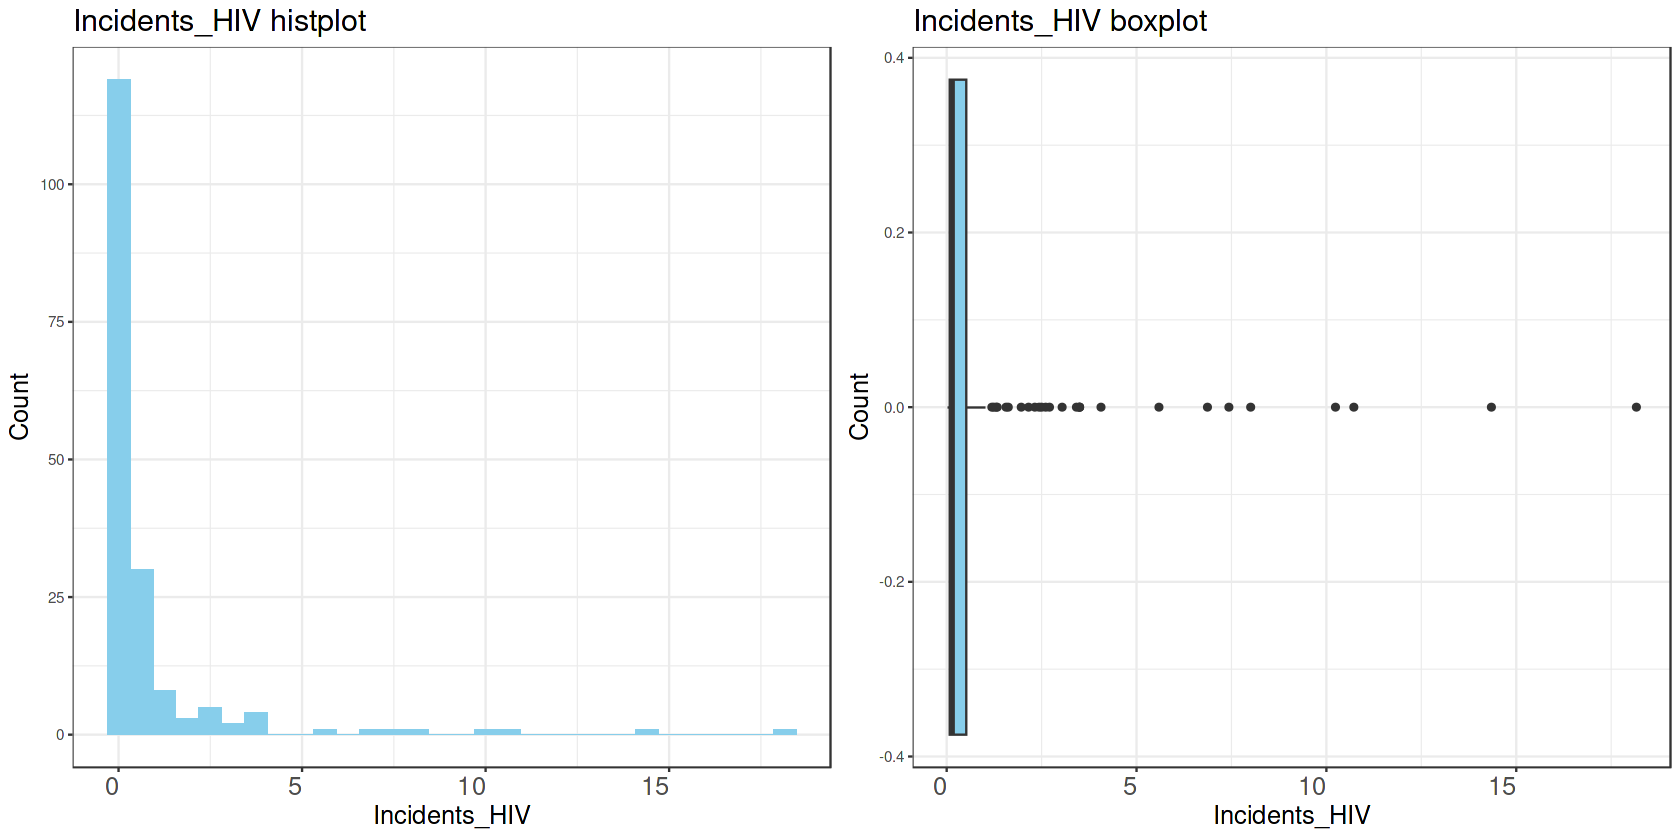

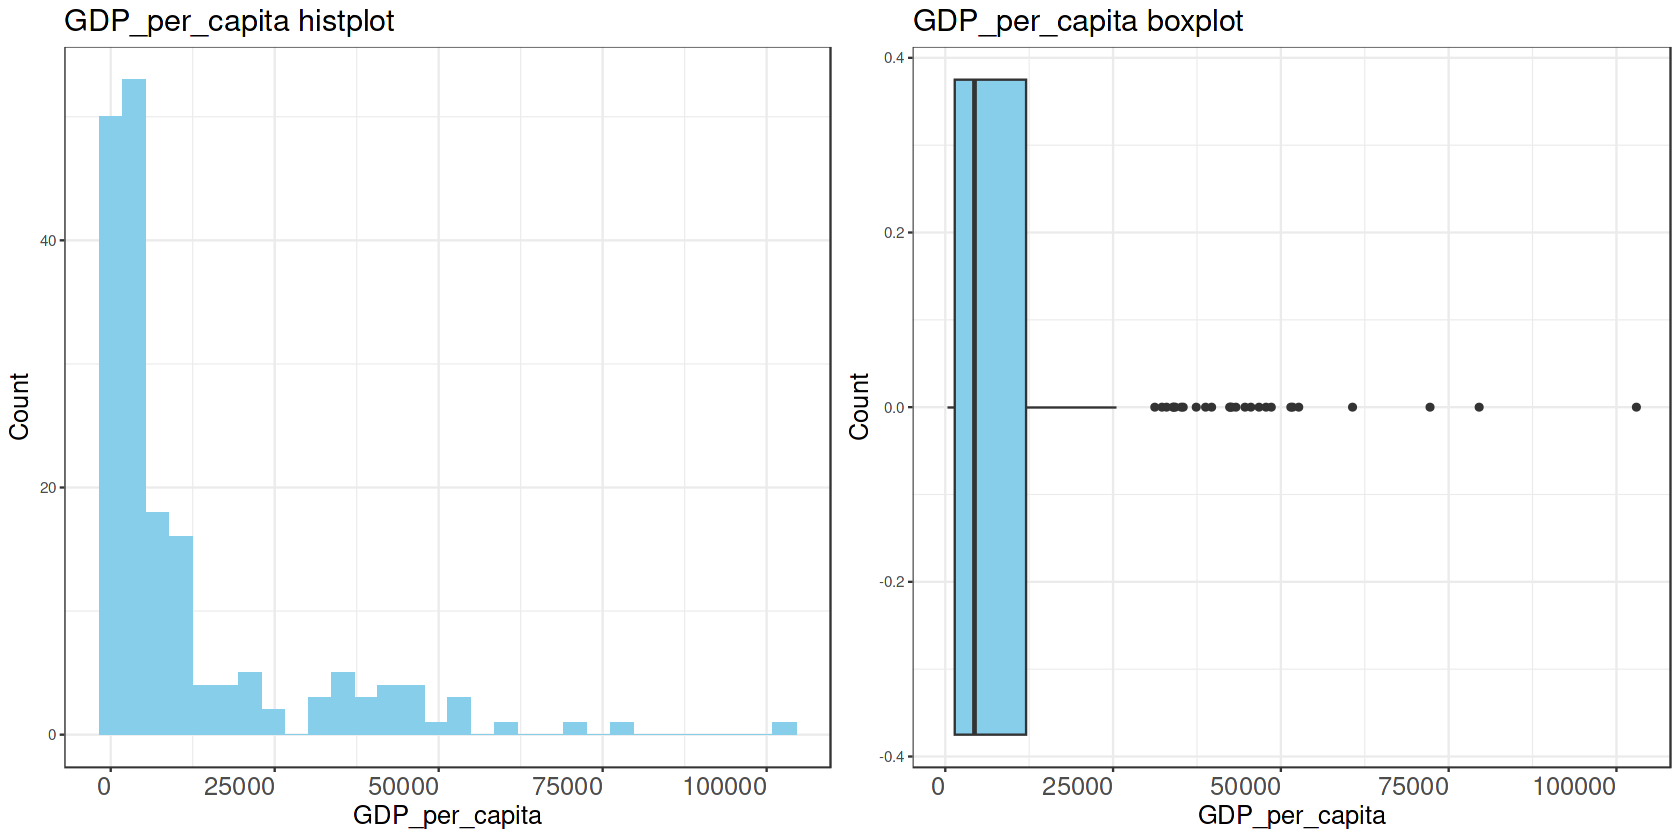

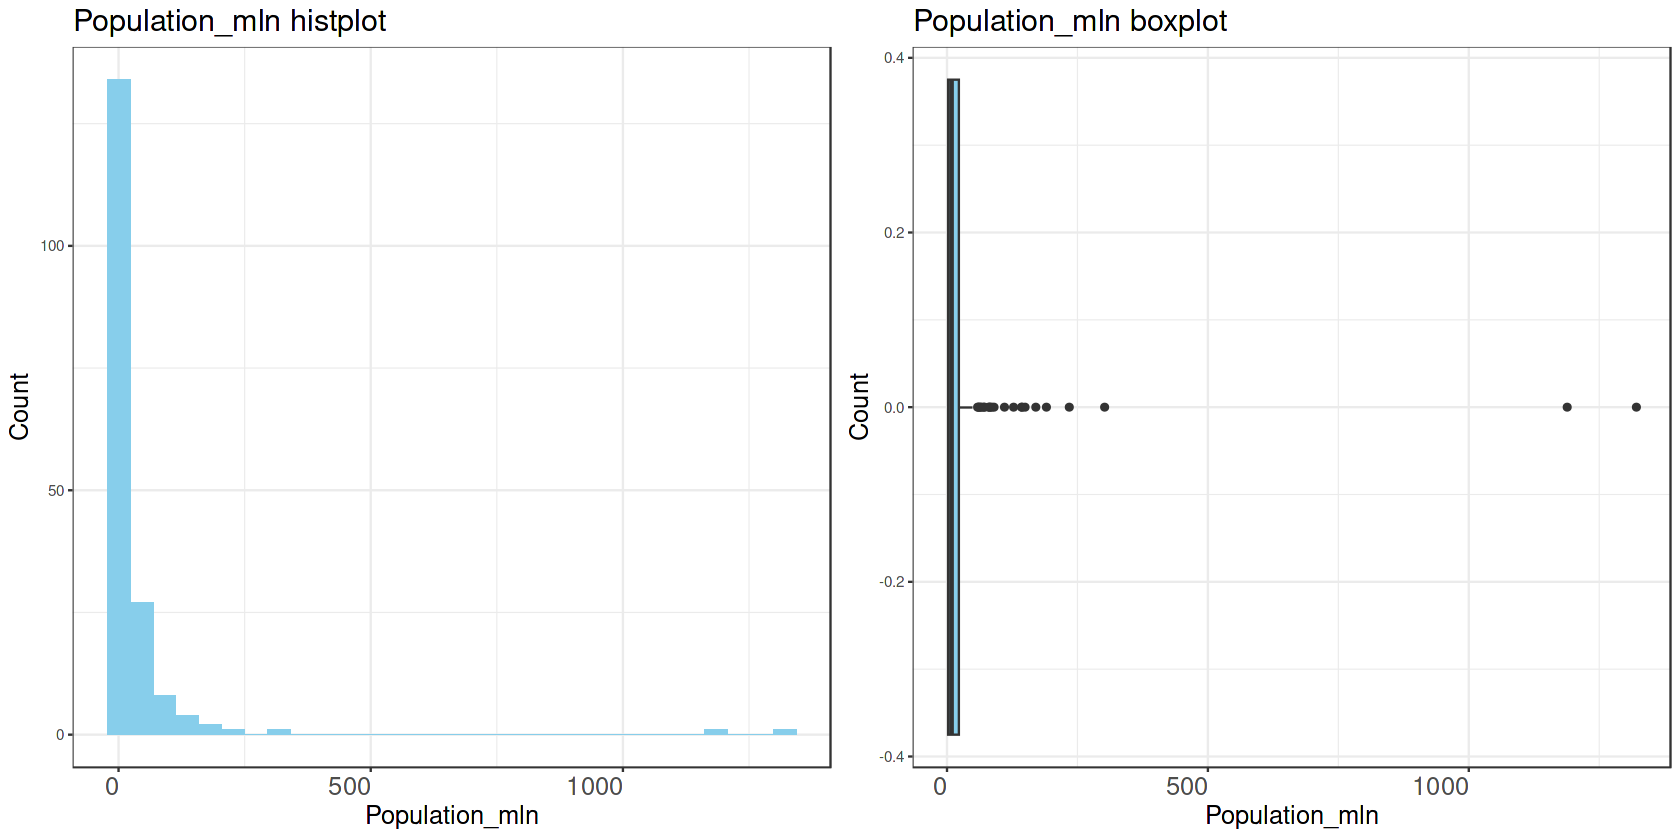

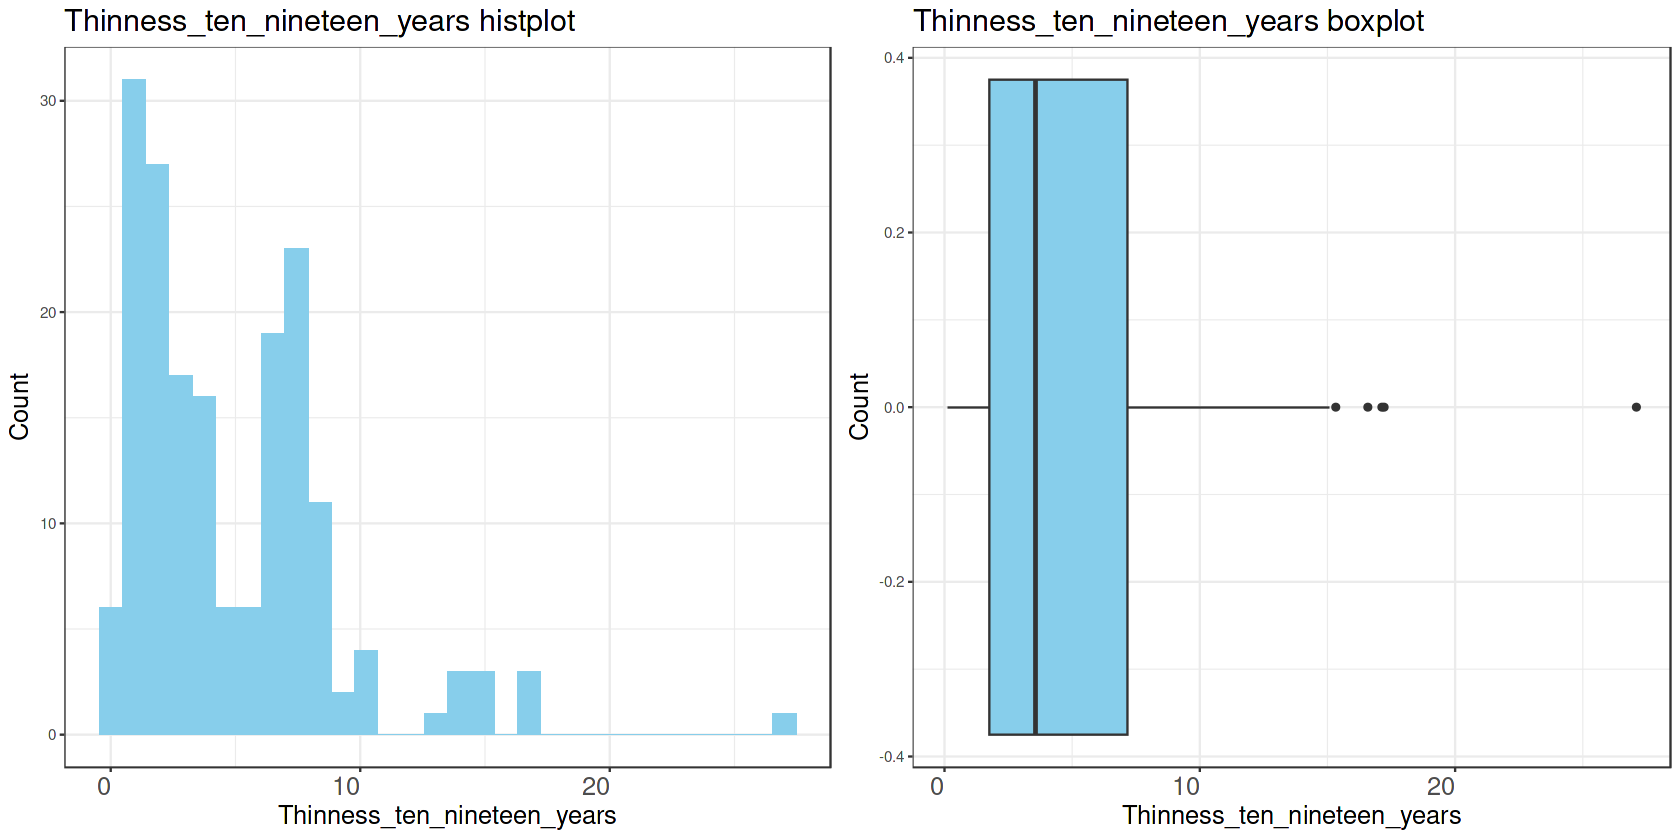

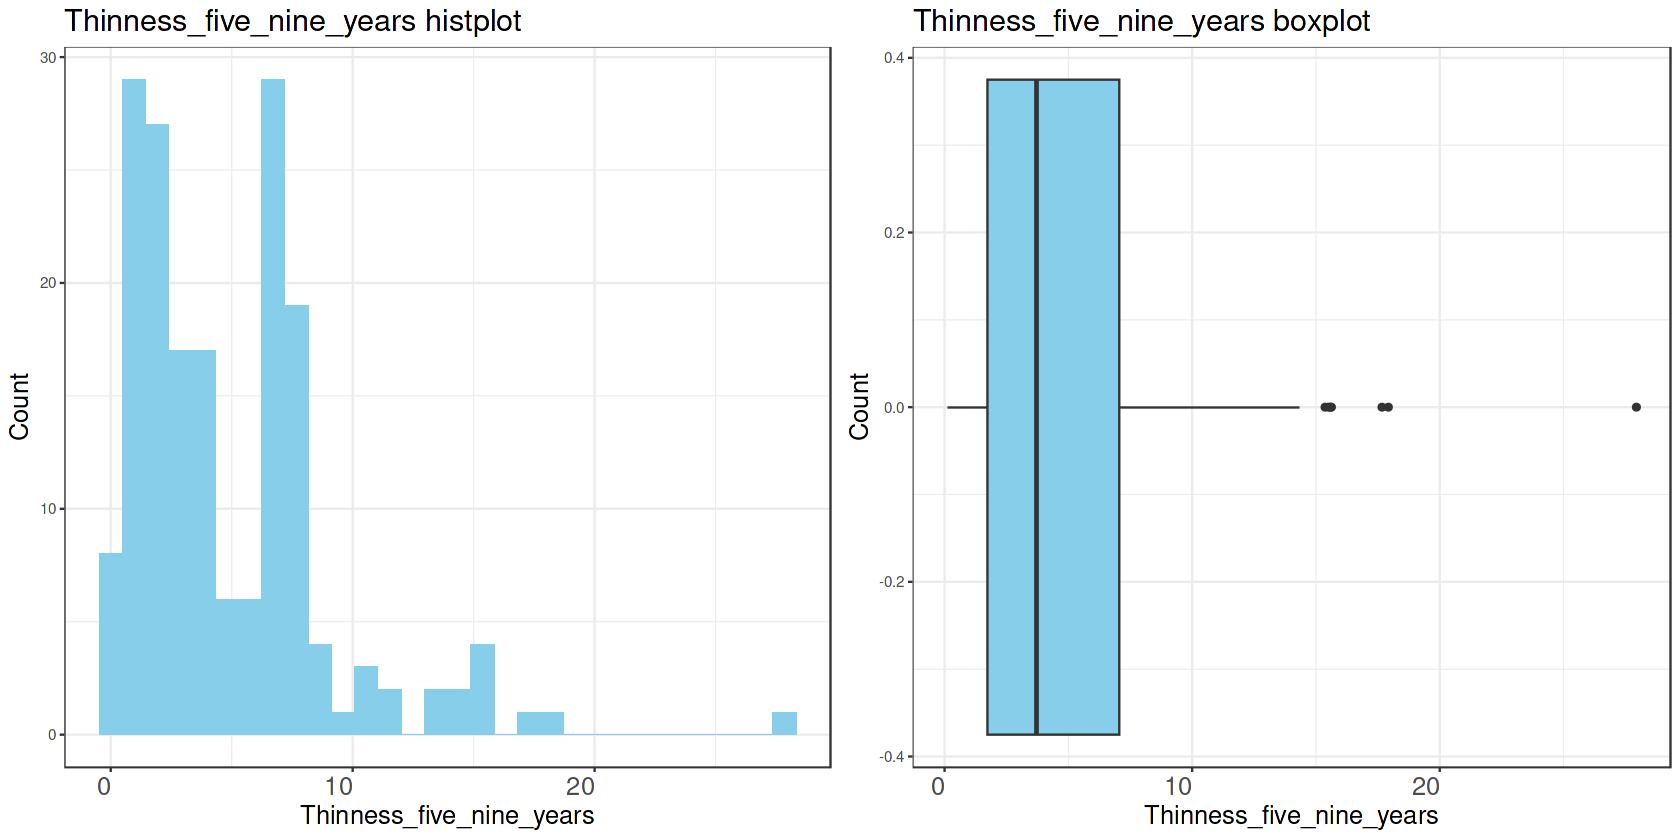

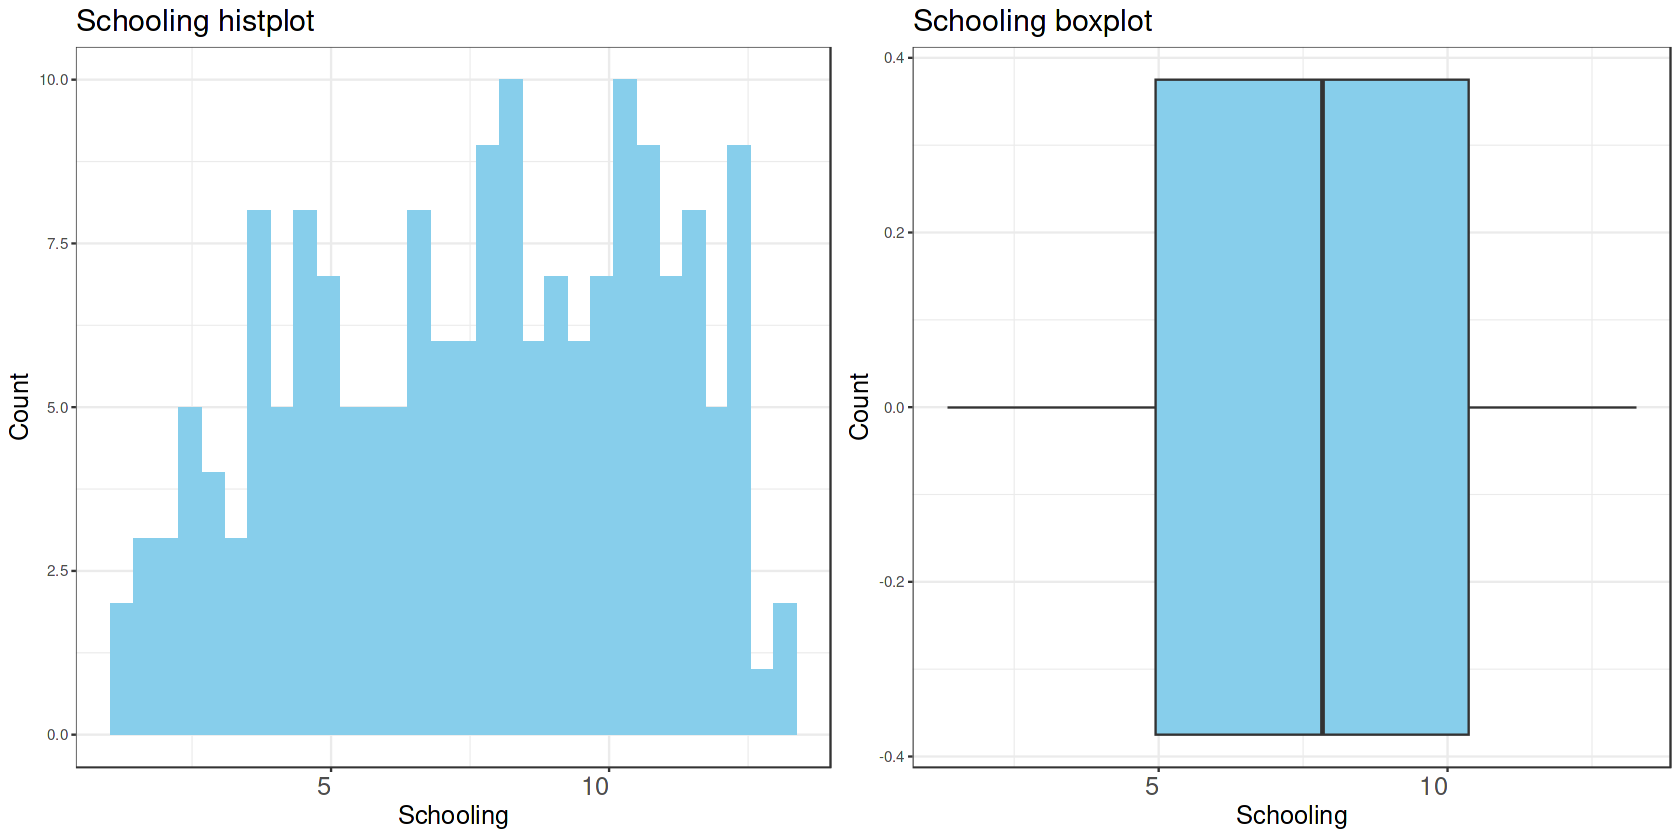

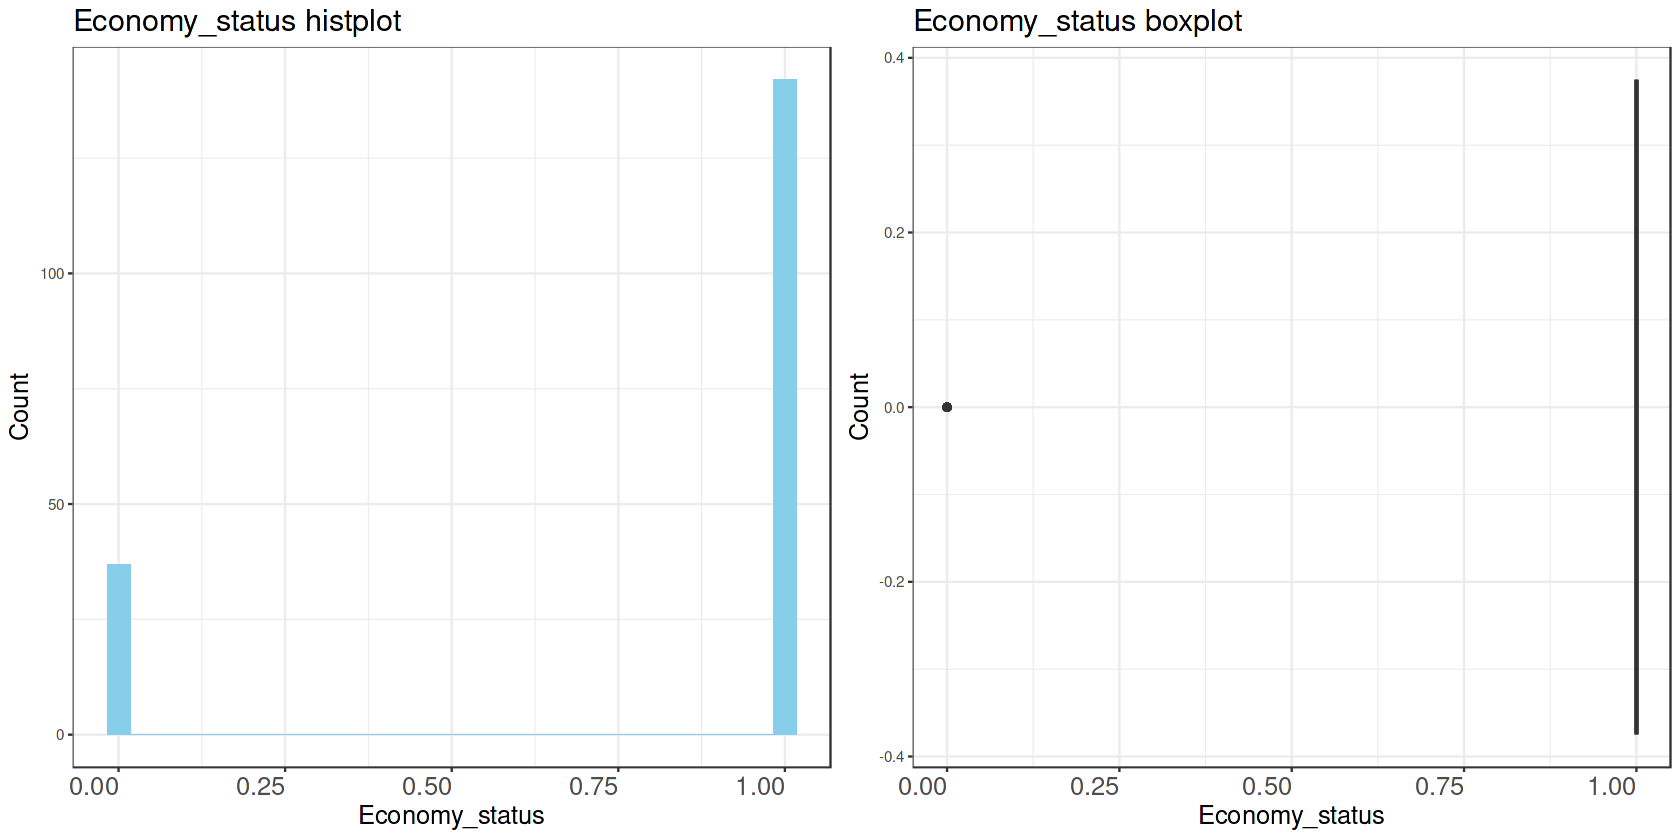

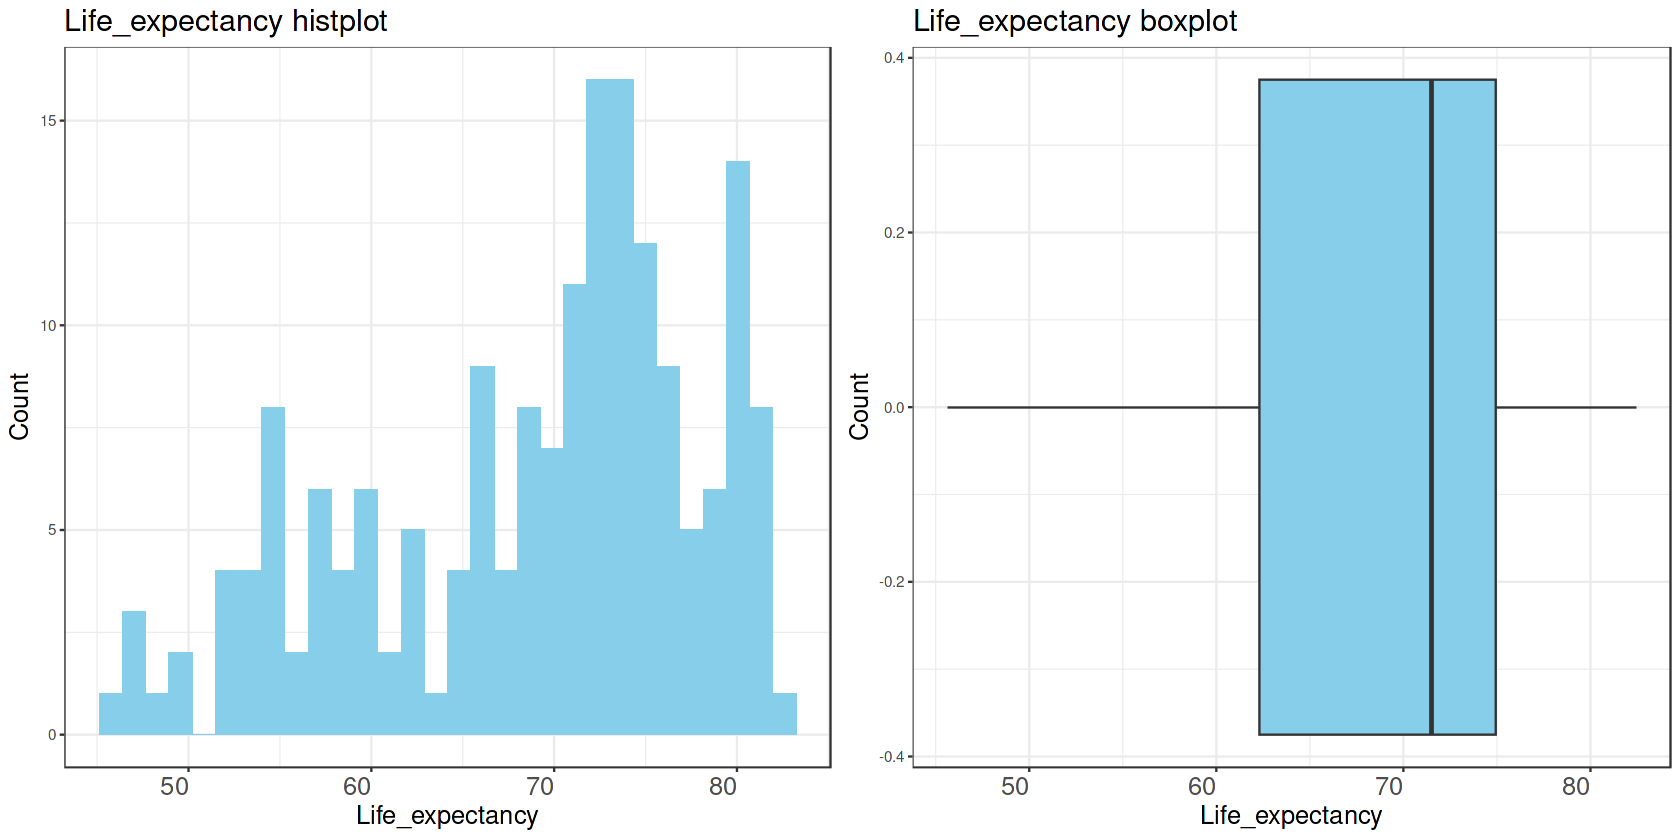

In [18]:
for(i in num_cols){
        a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', bins = 30) + 
            labs(title = paste0(names(df[i]),' histplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
        b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    grid.arrange(a,b, ncol= 2)    
}

## **Top 10 Countries for The Number of infant Deaths Per 1,000 Births**

In [19]:
top10_id <- df %>% group_by(Country)  %>% arrange(-Infant_deaths) %>% select(Country, Infant_deaths)
top10_id <- top10_id[1:10,]

In [20]:
top10_id

Country,Infant_deaths
<fct>,<dbl>
Sierra Leone,115.71875
Central African Republic,101.34375
Somalia,98.25625
Nigeria,91.20625
"Congo, Dem. Rep.",89.48125
Angola,88.76875
Chad,88.03125
Equatorial Guinea,86.56875
Liberia,86.03125


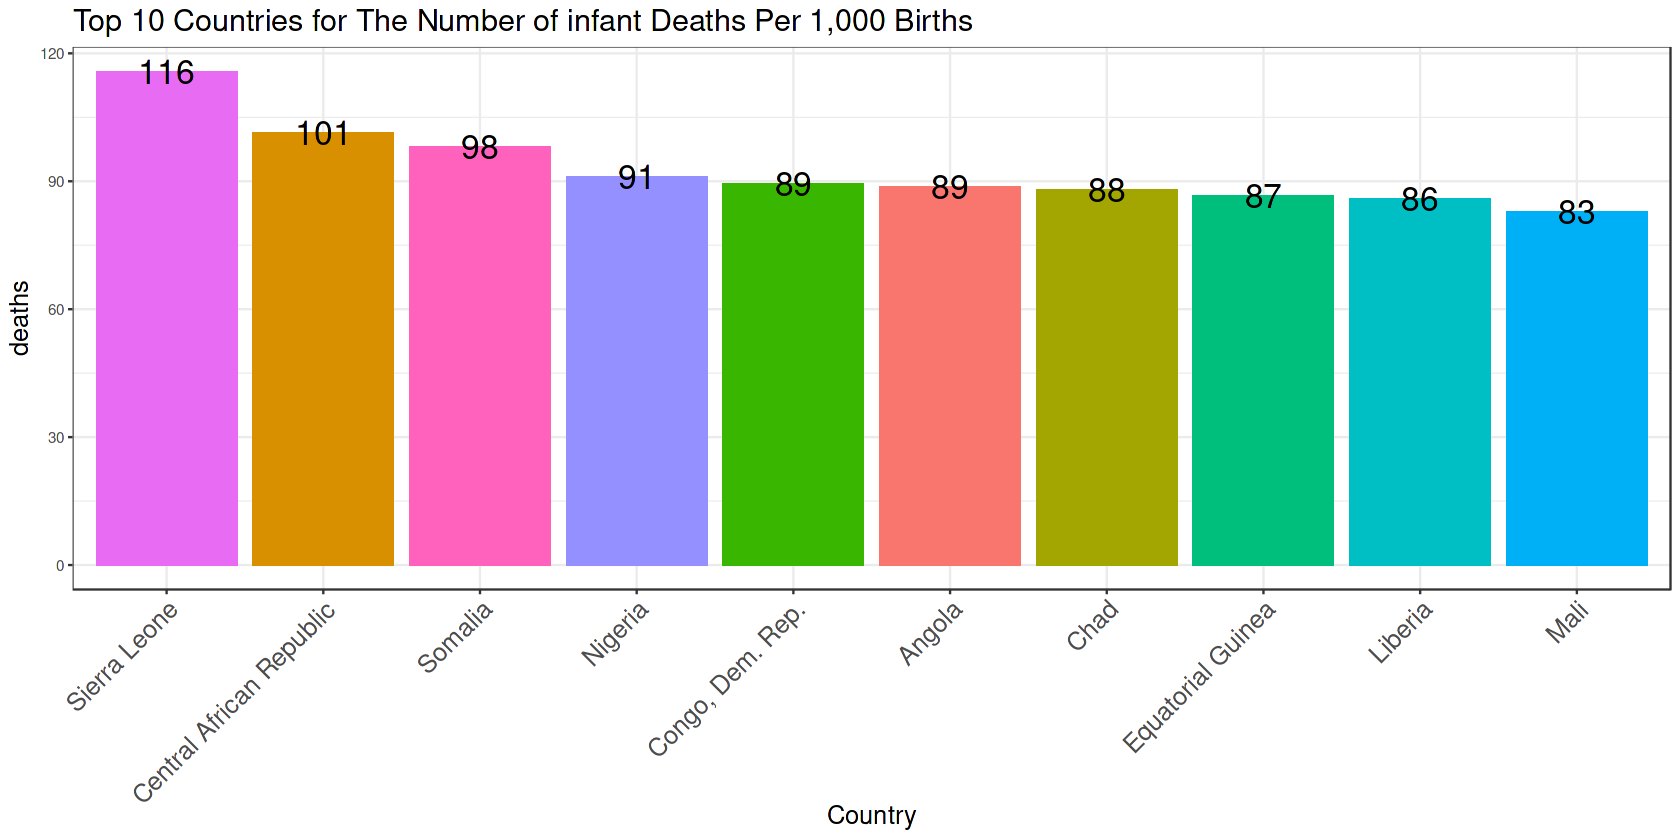

In [21]:
ggplot(top10_id) + geom_col(aes(x= reorder(Country, -Infant_deaths), y = Infant_deaths, fill = Country)) + 
            geom_text(aes(y = Infant_deaths , x = Country , label = round(Infant_deaths,0)),size = 7)+
            labs(title = 'Top 10 Countries for The Number of infant Deaths Per 1,000 Births', x = 'Country', y = 'deaths') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

## **Top 10 Countries for The Number of Deaths of Children Under 5 Per 1,000 Births** 

In [22]:
top10_ufd <- df %>% group_by(Country)  %>% arrange(-Under_five_deaths) %>% select(Country, Under_five_deaths)
top10_ufd <- top10_ufd[1:10,]

In [23]:
top10_ufd

Country,Under_five_deaths
<fct>,<dbl>
Sierra Leone,178.7250
Somalia,161.2688
Chad,156.9437
Central African Republic,150.6813
Niger,150.4000
Nigeria,148.2500
Mali,144.7375
Angola,144.1625
Burkina Faso,138.2688


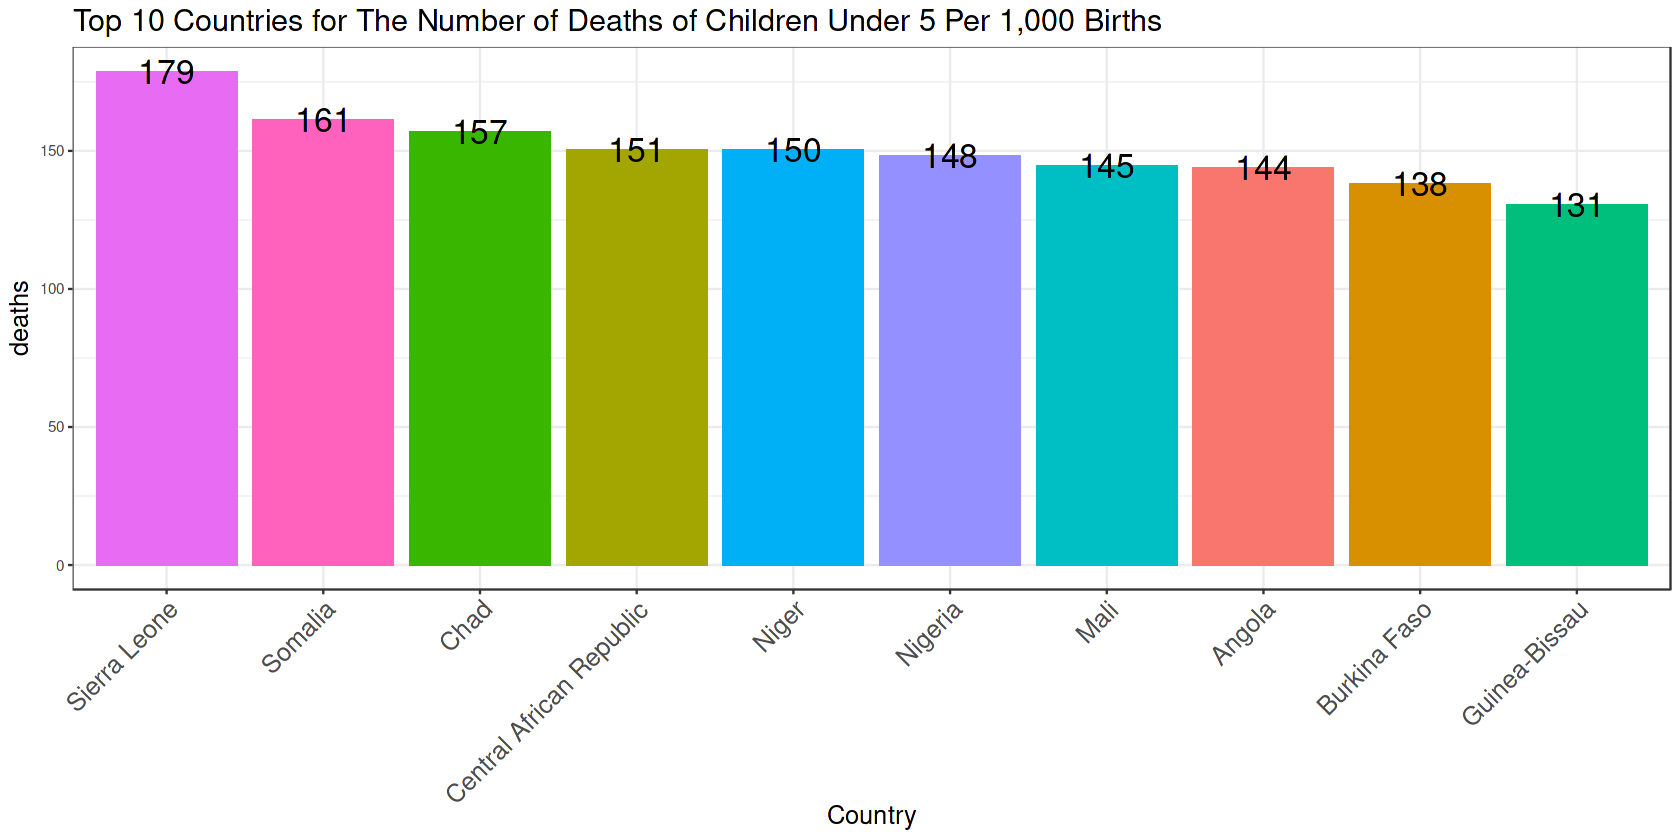

In [24]:
ggplot(top10_ufd) + geom_col(aes(x= reorder(Country, -Under_five_deaths), y = Under_five_deaths, fill = Country)) + 
            geom_text(aes(y = Under_five_deaths , x = Country , label = round(Under_five_deaths,0)),size = 7)+
            labs(title = 'Top 10 Countries for The Number of Deaths of Children Under 5 Per 1,000 Births', x = 'Country', y = 'deaths') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

## **Top10 countries with Adult mortality rate per 1000 population**

In [25]:
top10_am <- df %>% group_by(Country)  %>% arrange(-Adult_mortality) %>% select(Country, Adult_mortality)
top10_am <- top10_am[1:10,]

In [26]:
top10_am

Country,Adult_mortality
<fct>,<dbl>
Zimbabwe,572.9743
Lesotho,571.0727
Eswatini,539.5658
Central African Republic,493.0152
South Africa,454.7116
Malawi,453.3936
Sierra Leone,453.0495
Zambia,452.7612
Namibia,434.2549


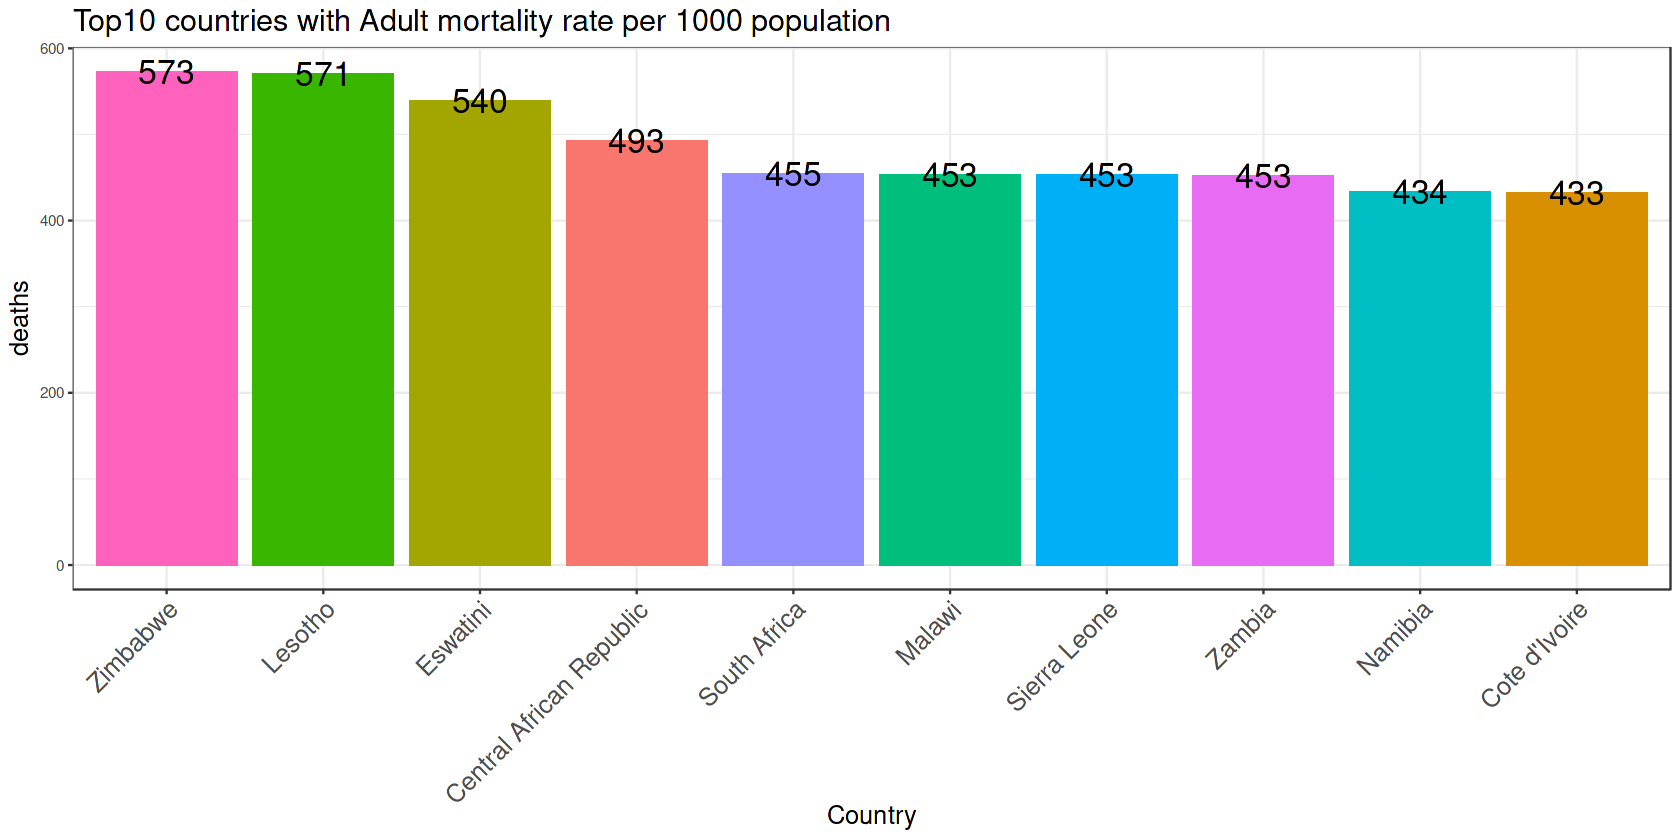

In [27]:
ggplot(top10_am) + geom_col(aes(x= reorder(Country, -Adult_mortality), y = Adult_mortality, fill = Country)) + 
            geom_text(aes(y = Adult_mortality , x = Country , label = round(Adult_mortality,0)),size = 7)+
            labs(title = 'Top10 countries with Adult mortality rate per 1000 population', x = 'Country', y = 'deaths') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

## **Top 10 countries with the highest average life expectancy**

In [28]:
top10_le <- df %>% group_by(Country)  %>% arrange(-Life_expectancy) %>% select(Country, Life_expectancy)
top10_le <- top10_le[1:10,]

In [29]:
top10_le

Country,Life_expectancy
<fct>,<dbl>
Japan,82.45625
Switzerland,81.67500
Iceland,81.57500
Italy,81.38750
Australia,81.11250
Spain,81.10625
Sweden,80.99375
France,80.91250
Israel,80.79375


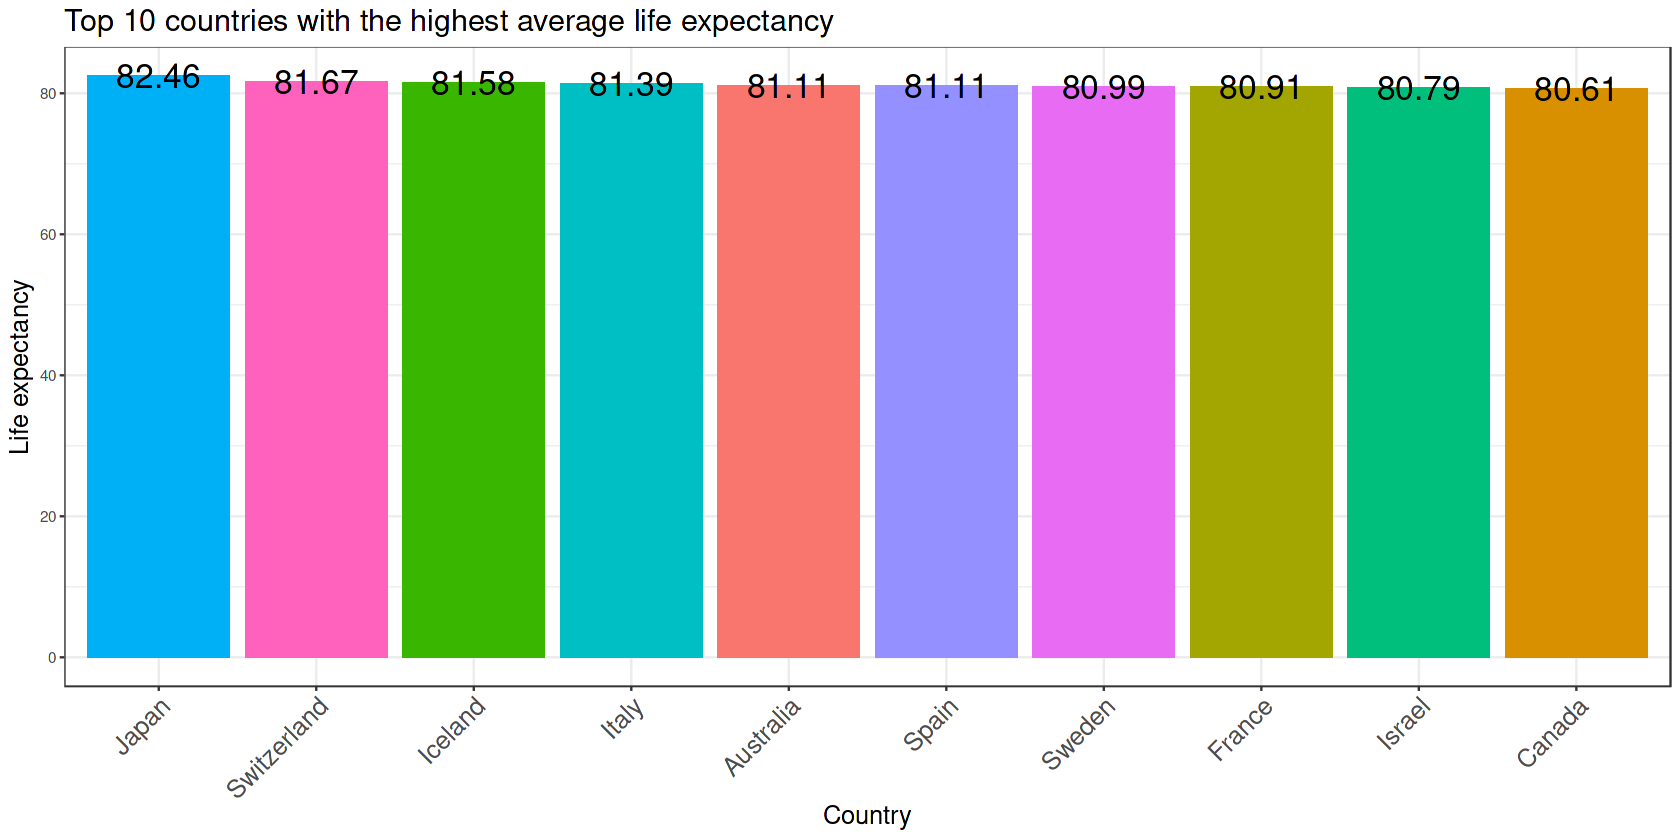

In [30]:
ggplot(top10_le) + geom_col(aes(x= reorder(Country, -Life_expectancy), y = Life_expectancy, fill = Country)) + 
            geom_text(aes(y = Life_expectancy , x = Country , label = round(Life_expectancy,2)),size = 7)+
            labs(title = 'Top 10 countries with the highest average life expectancy', x = 'Country', y = 'Life expectancy') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

## **Top 10 countries with the lowest average life expectancy**

In [31]:
top10_le_low <- df %>% group_by(Country)  %>% arrange(Life_expectancy) %>% select(Country, Life_expectancy)
top10_le_low <- top10_le_low[1:10,]

In [32]:
top10_le_low

Country,Life_expectancy
<fct>,<dbl>
Lesotho,45.60625
Central African Republic,46.48125
Eswatini,46.69375
Sierra Leone,46.70000
Zimbabwe,48.66250
Nigeria,49.58125
Chad,49.94375
Mozambique,51.88125
Cote d'Ivoire,51.95000


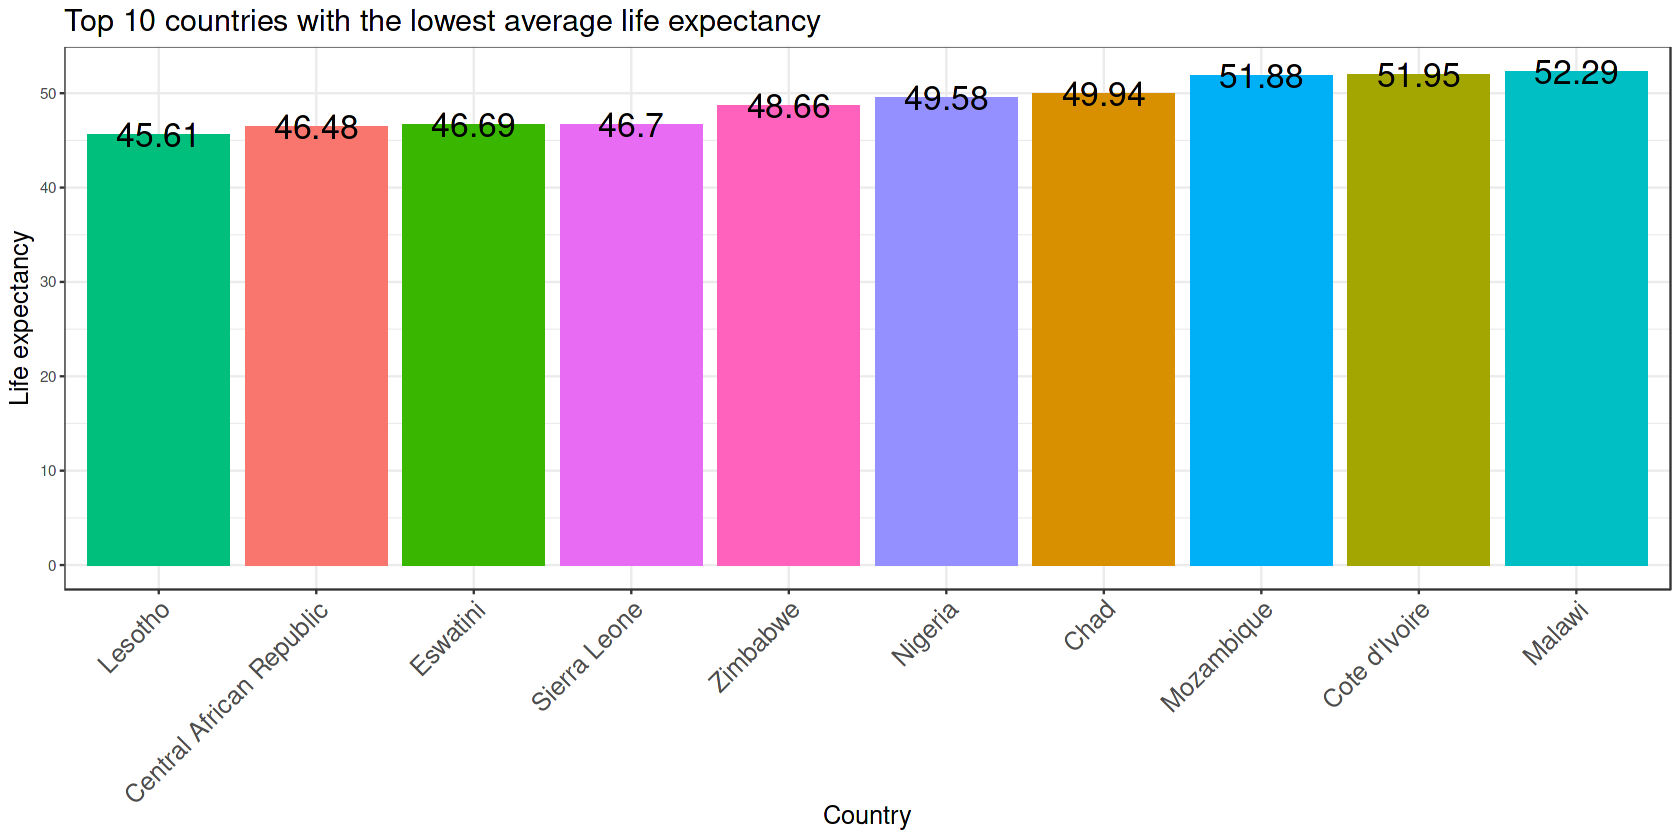

In [33]:
ggplot(top10_le_low) + geom_col(aes(x= reorder(Country, Life_expectancy), y = Life_expectancy, fill = Country)) + 
            geom_text(aes(y = Life_expectancy , x = Country , label = round(Life_expectancy,2)),size = 7)+
            labs(title = 'Top 10 countries with the lowest average life expectancy', x = 'Country', y = 'Life expectancy') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

## **Average Infant mortality, Average  adult mortality, and Average  life expectancy by continent**

In [34]:
continent <- df %>% group_by(Region) %>% 
            select(Region, Infant_deaths,Under_five_deaths,Adult_mortality,Life_expectancy) %>%
            summarize(Infant_deaths = mean(Infant_deaths, na.rm=T),
                      Under_five_deaths =  mean(Under_five_deaths, na.rm=T),
                      Adult_mortality = mean(Adult_mortality, na.rm=T),
                     Life_expectancy = mean(Life_expectancy, na.rm=T))

In [35]:
continent

Region,Infant_deaths,Under_five_deaths,Adult_mortality,Life_expectancy
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,60.604044,94.025000,319.0734,57.84730
Asia,32.536111,40.965278,171.1666,69.45486
Central America and Caribbean,20.965461,25.932237,163.5812,72.43750
European Union,4.872222,5.858333,104.3954,77.71505
Middle East,16.639286,20.457143,111.1589,73.97545
North America,9.925000,11.647917,100.6938,77.84167
Oceania,26.305114,32.493750,162.8868,69.51761
Rest of Europe,9.627917,11.179583,138.5829,74.52542
South America,19.953646,23.938021,155.2753,72.78073


In [36]:
options(repr.plot.width = 15.0, repr.plot.height = 15.0)

a <- ggplot(continent) + geom_col(aes(x= reorder(Region, -Infant_deaths), y = Infant_deaths, fill = Region)) + 
            geom_text(aes(y = Infant_deaths , x = Region , label = round(Infant_deaths,2)),size = 5)+
            labs(title = 'Average Infant mortality by continent', x = 'Country', y = 'Infant_deaths') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

 b <- ggplot(continent) + geom_col(aes(x=reorder(Region, -Under_five_deaths), y = Under_five_deaths, fill = Region)) + 
            geom_text(aes(y = Under_five_deaths , x = Region , label = round(Under_five_deaths,2)),size = 5)+
            labs(title = 'Average Under_five_deaths by continent', x = 'Country', y = 'Under_five_deaths') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

c <- ggplot(continent) + geom_col(aes(x= reorder(Region, -Adult_mortality), y = Adult_mortality, fill = Region)) + 
            geom_text(aes(y = Adult_mortality , x = Region , label = round(Adult_mortality,2)),size = 5)+
            labs(title = 'Average Adult_mortality by continent', x = 'Country', y = 'Adult_mortality') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

d <- ggplot(continent) + geom_col(aes(x= reorder(Region, Life_expectancy), y = Life_expectancy, fill = Region)) + 
            geom_text(aes(y = Life_expectancy , x = Region , label = round(Life_expectancy,2)),size = 5)+
            labs(title = 'Average Life_expectancy by continent', x = 'Country', y = 'Life_expectancy') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1, angle = 45),
                title = element_text(size=15)
            )

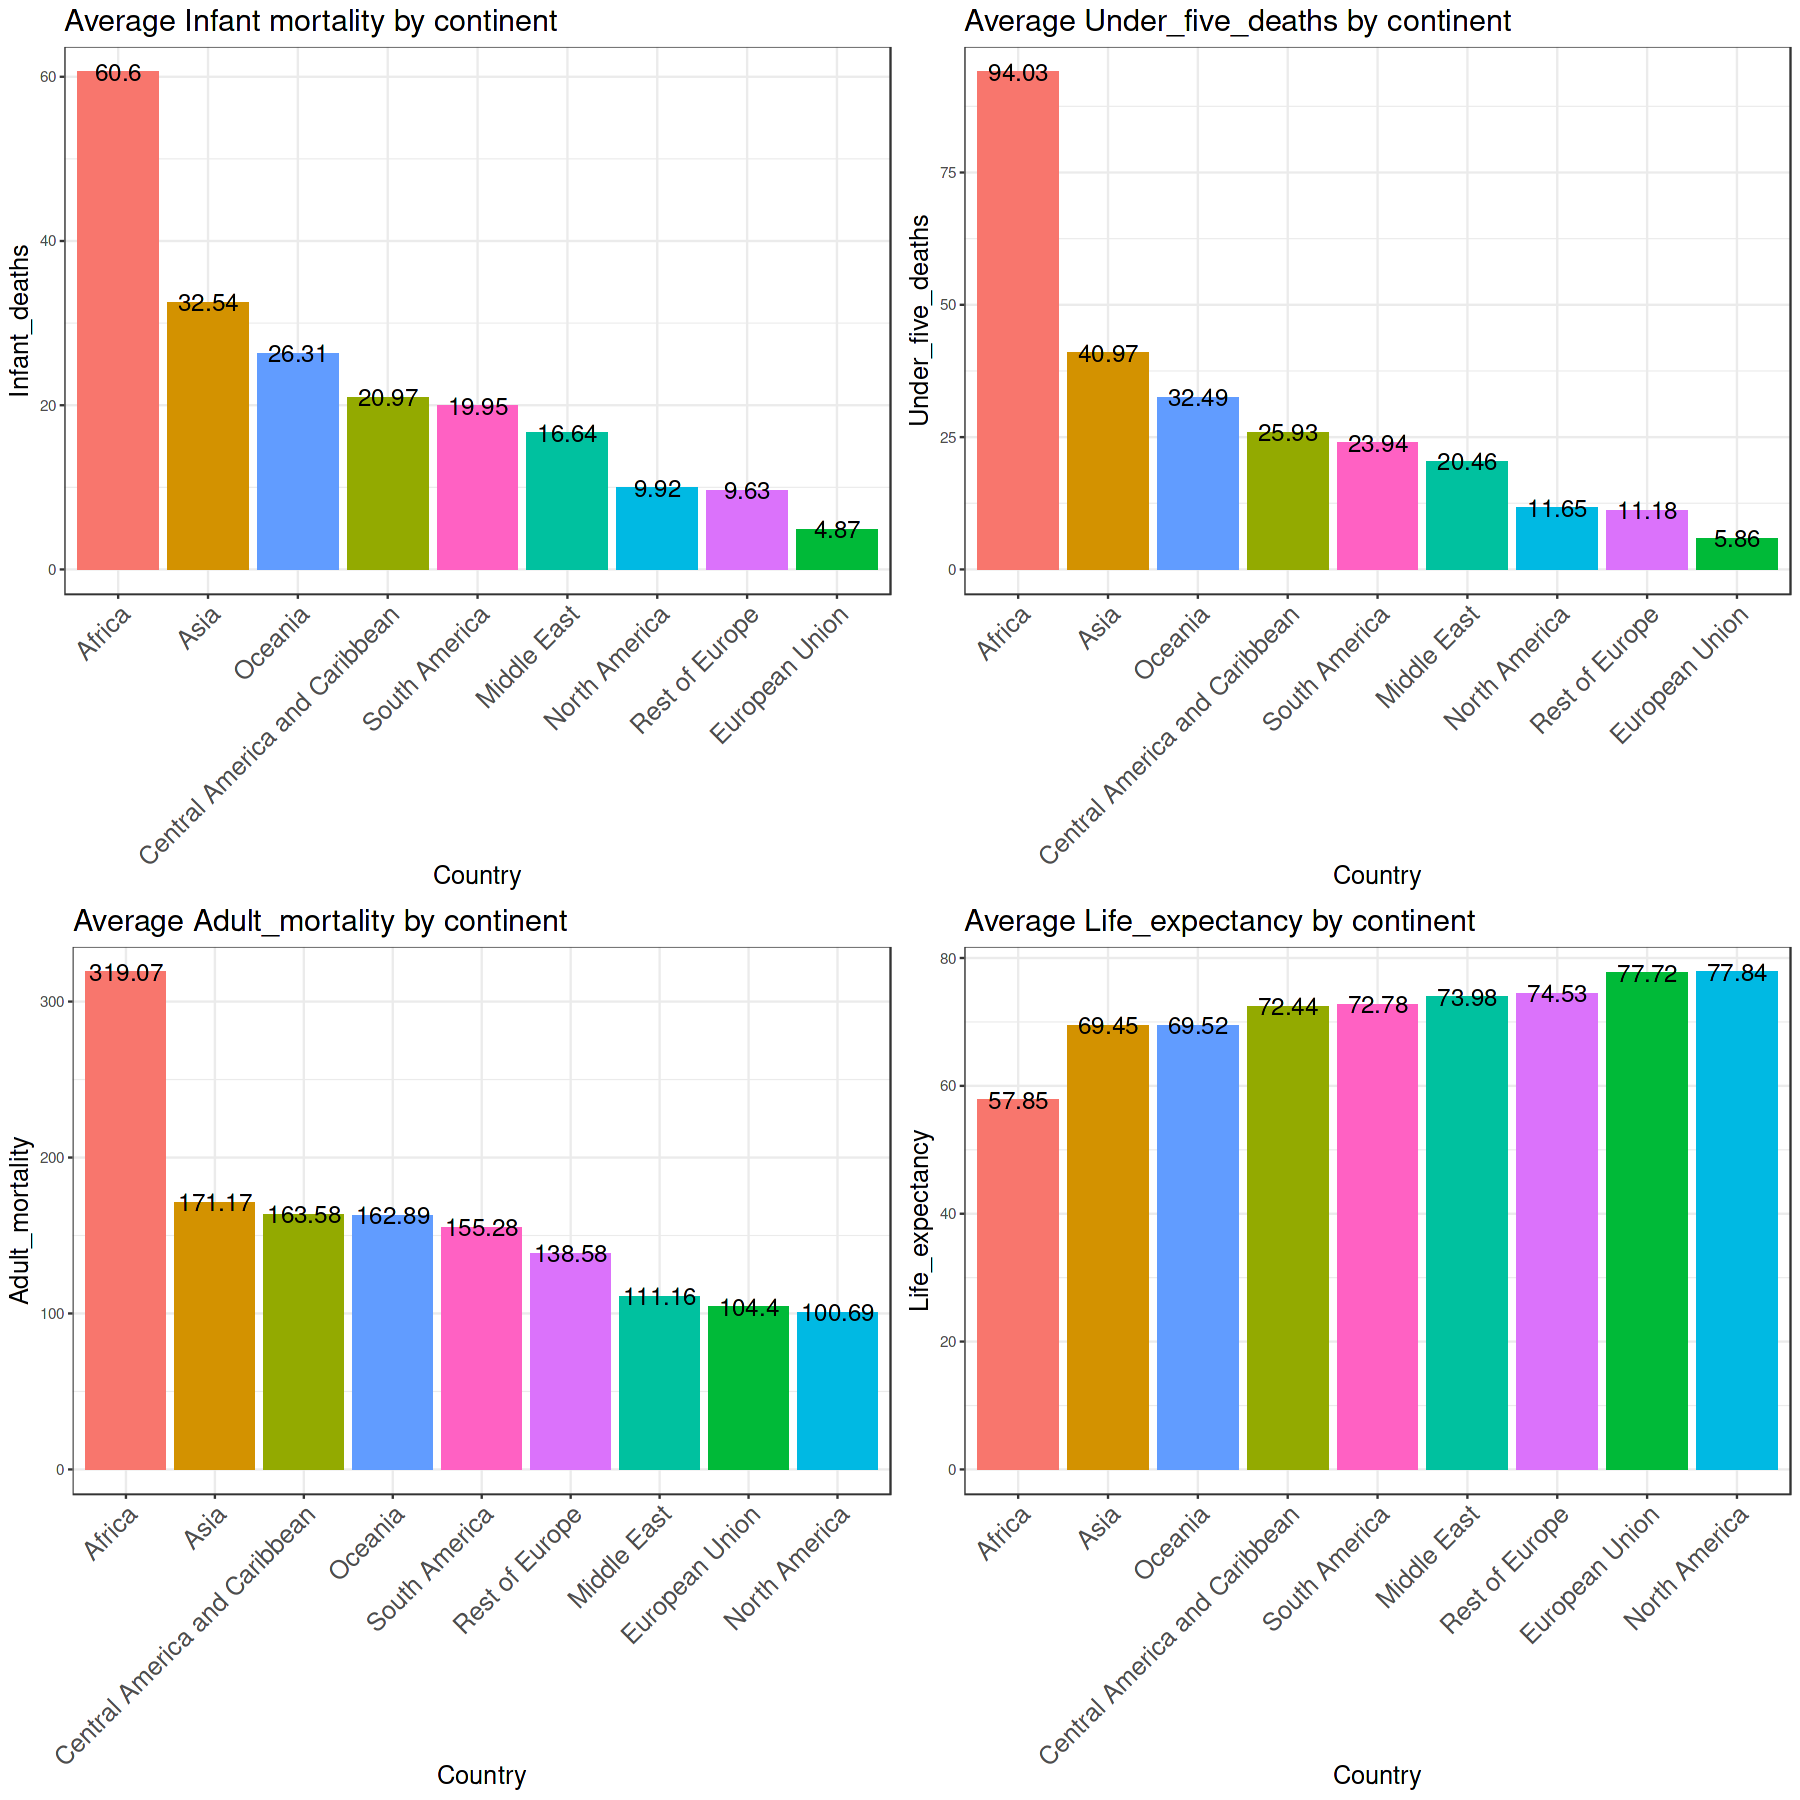

In [37]:
grid.arrange(a,b,c,d , ncol=2)

* **Sierra Leone has a high mortality rate for infants and children under 5.**
* **Zimbabwe has the highest adult mortality rate**
* **Japan has the highest life expectancy.**
* **Lesotho has the highest adult mortality rate and the lowest average life expectancy.**
* **Africa has the highest Infant deaths, Adult mortality rate. and the lowest life_expectancy**
* **Europe has the lowest infant mortality rate**

In [38]:
head(df)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
,<fct>,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Asia,1975-07-01,71.08125,98.61250,265.80497,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1,59.65625
2,Albania,Rest of Europe,1975-07-01,15.25625,17.14375,83.13297,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1,75.95000
3,Algeria,Africa,1975-07-01,26.75625,31.19375,113.43928,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1,73.78750
4,Angola,Africa,1975-07-01,88.76875,144.16250,297.84406,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1,52.82500
5,Antigua and Barbuda,Central America and Caribbean,1975-07-01,9.47500,11.51875,142.47881,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1,75.35000
6,Argentina,South America,1975-07-01,13.85000,15.50625,127.91266,7.959375,85.3125,84.6875,26.85000,92.2500,92.3750,0.145625,12169.1250,39.913125,1.07500,0.95000,9.36875,1,74.86250


## **Correlation**

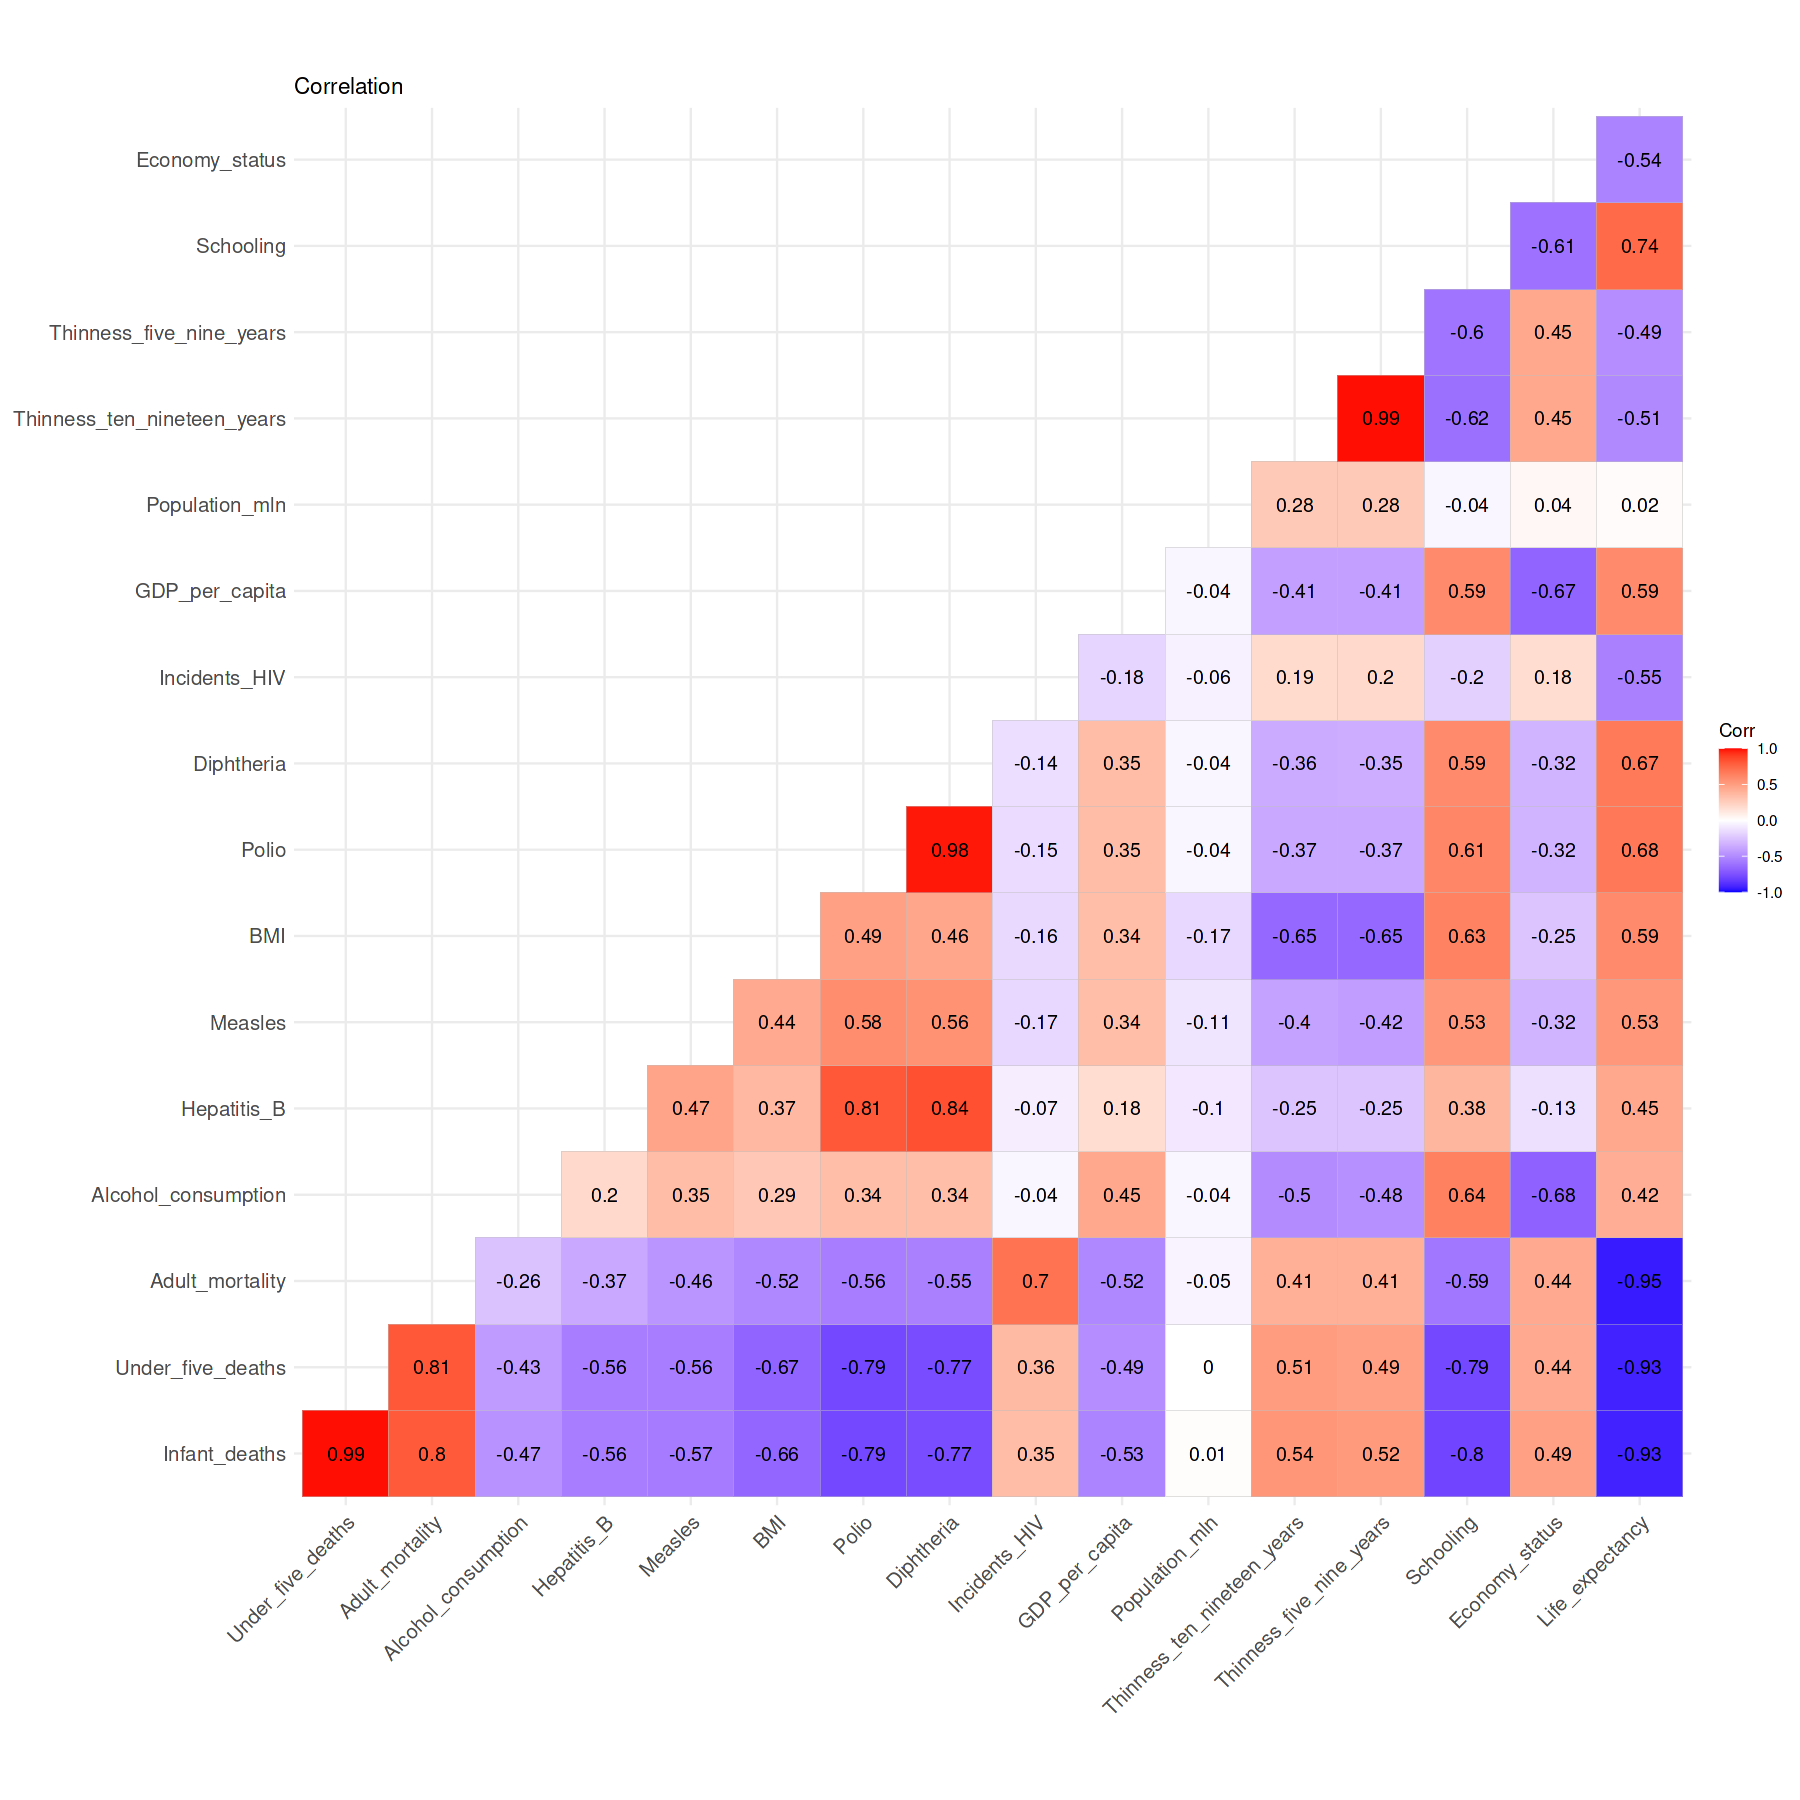

In [39]:
ggcorrplot(cor(df[num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [40]:
library(caret)
library(Metrics)
library(rpart)

Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress





Attaching package: ‘Metrics’




The following objects are masked from ‘package:caret’:

    precision, recall




## **Data Preprocessing**

In [41]:
df <- df %>% select(-Country, -Year)

In [42]:
df$Region <- ifelse(df$Region == 'Africa' , 0 , 
                   ifelse(df$Region == 'Asia' , 1 , 
                         ifelse(df$Region == 'Central America and Caribbean' , 2 ,
                               ifelse(df$Region == 'European Union' , 3 ,
                                     ifelse(df$Region == 'Middle East' , 4 ,
                                           ifelse(df$Region == 'North America' , 5 ,
                                                 ifelse(df$Region == 'Oceania' , 6 ,
                                                       ifelse(df$Region == 'Rest of Europe' , 7 ,8))))))))


## **Split Data**

In [43]:
idx <- sample(nrow(df), nrow(df) * 0.75)
train <- df[idx,]
test <- df[-idx, ]

## **Linear Regression**

In [44]:
model_lm <- lm(Life_expectancy ~ ., data = train)

In [45]:
summary(model_lm)


Call:
lm(formula = Life_expectancy ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2839 -0.7520 -0.0212  0.7231  3.1055 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  8.657e+01  2.894e+00  29.910  < 2e-16 ***
Region                      -6.039e-02  6.192e-02  -0.975 0.331417    
Infant_deaths               -3.090e-02  2.718e-02  -1.137 0.257989    
Under_five_deaths           -7.759e-02  1.841e-02  -4.216 4.96e-05 ***
Adult_mortality             -4.596e-02  2.954e-03 -15.562  < 2e-16 ***
Alcohol_consumption          8.621e-02  4.503e-02   1.915 0.058015 .  
Hepatitis_B                 -1.696e-02  1.441e-02  -1.177 0.241482    
Measles                     -4.397e-03  8.574e-03  -0.513 0.609043    
BMI                         -1.618e-01  8.532e-02  -1.896 0.060459 .  
Polio                        2.092e-02  3.696e-02   0.566 0.572425    
Diphtheria                  -8.383e-03  3.663e-02  -0.2

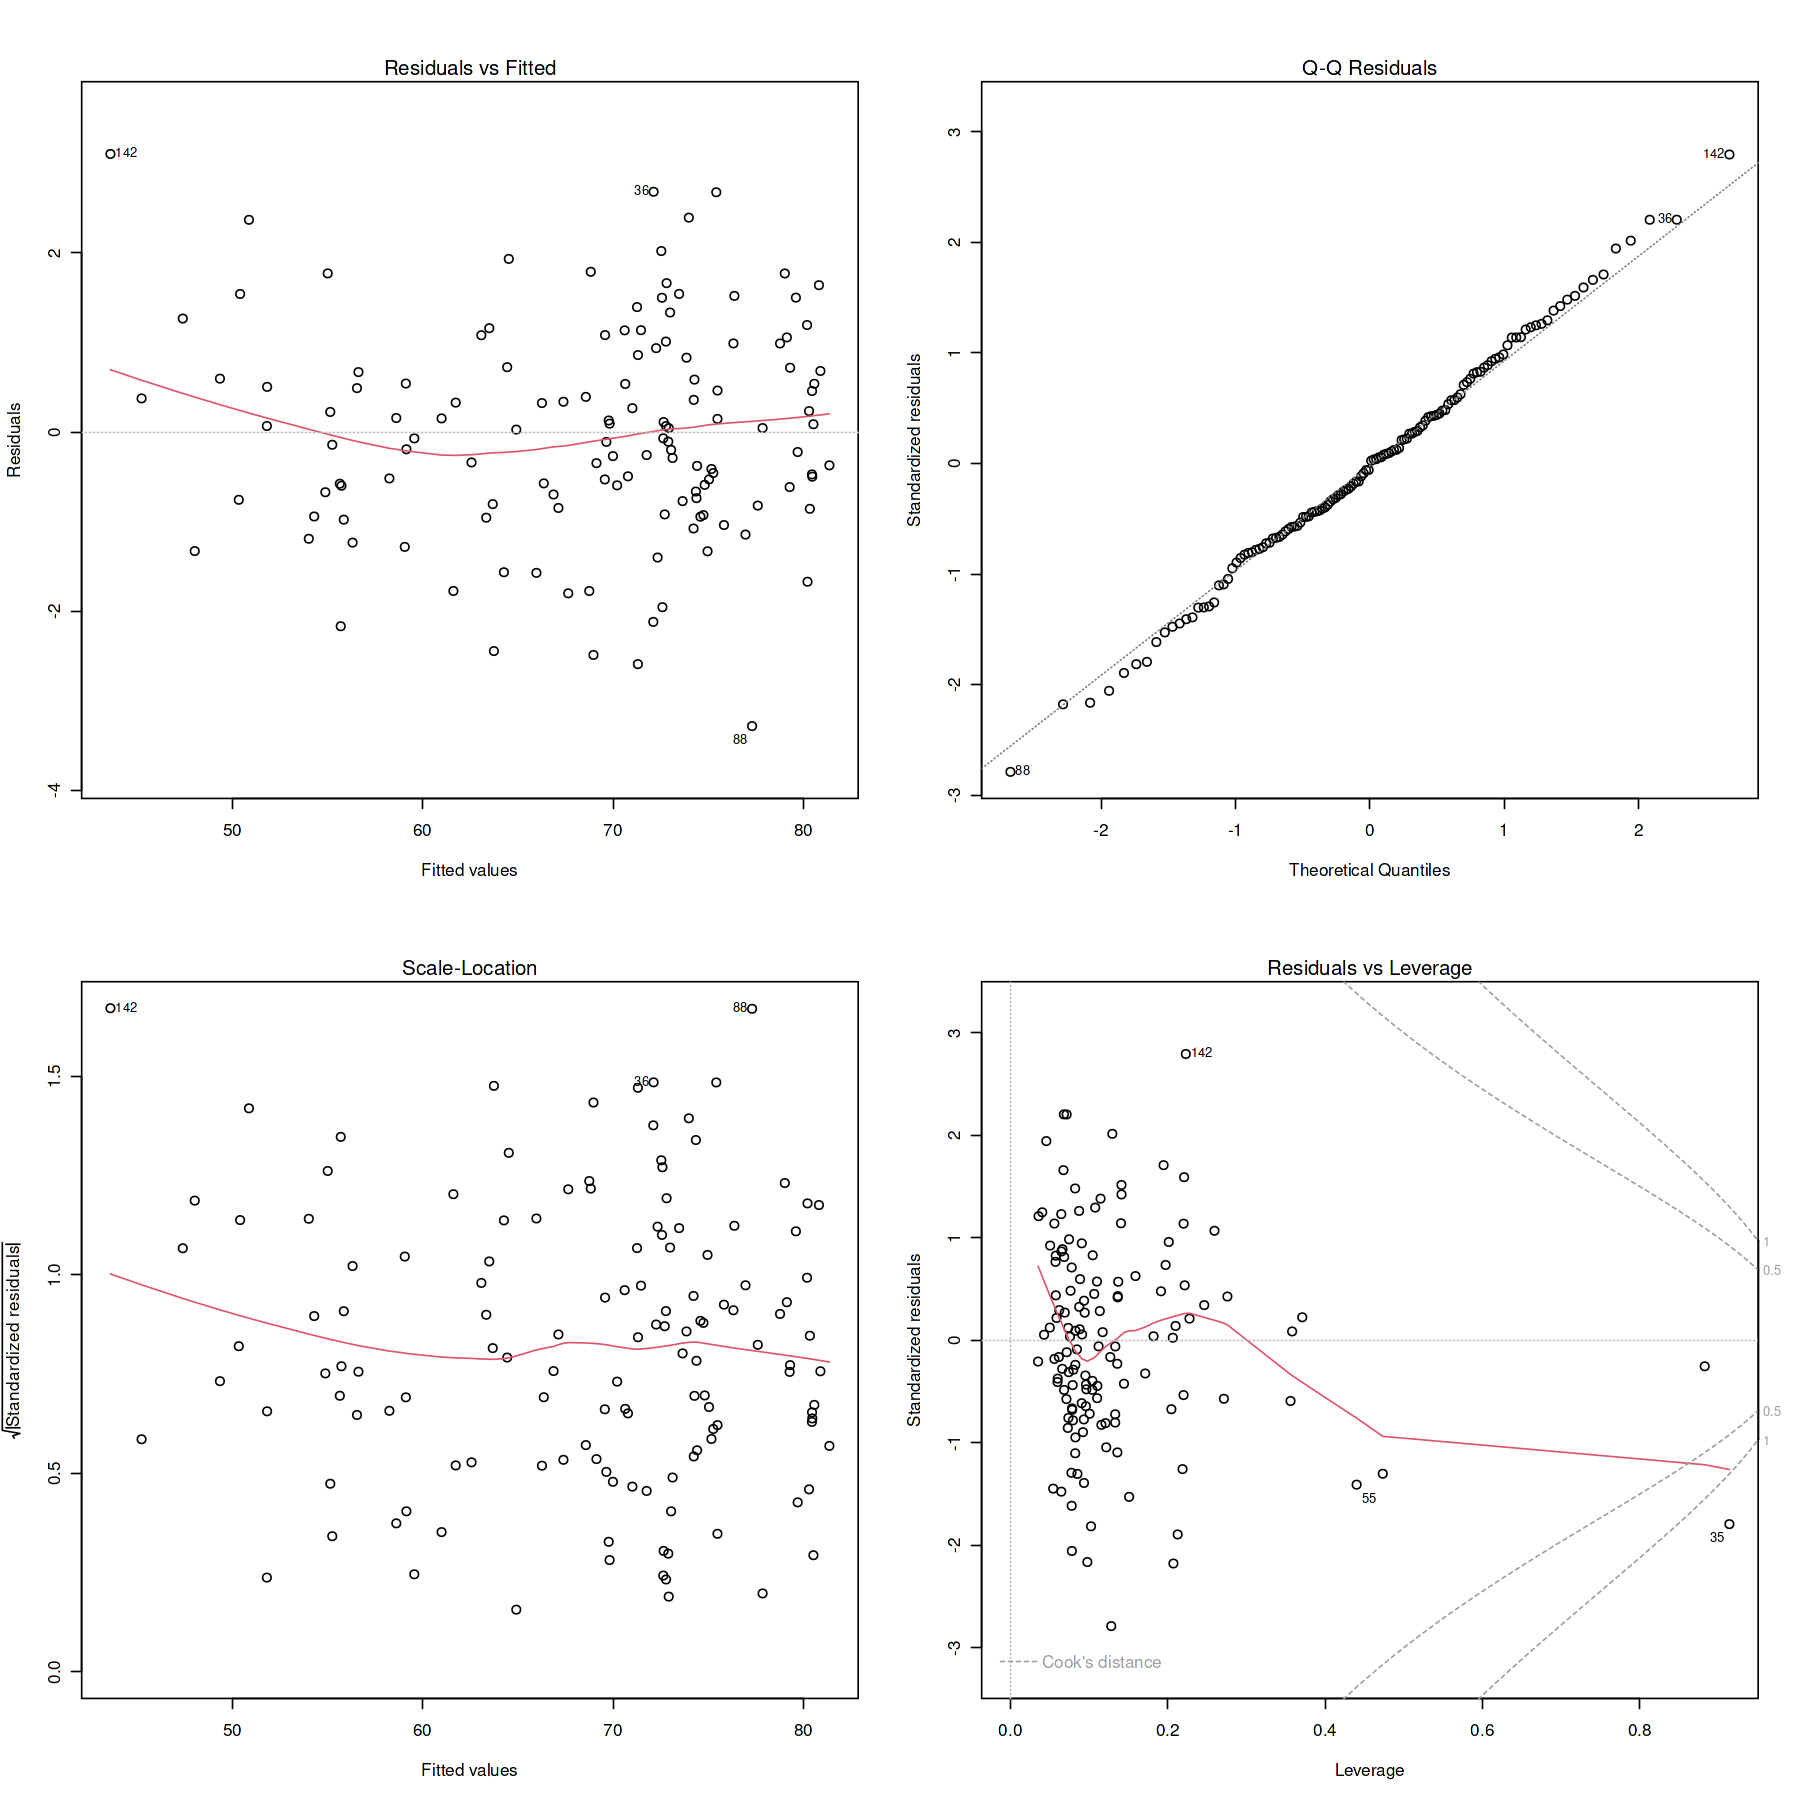

In [46]:
par(mfrow=c(2,2))
plot(model_lm)

In [47]:
best_linearmodel <- step(model_lm, direction = "both")

Start:  AIC=78.81
Life_expectancy ~ Region + Infant_deaths + Under_five_deaths + 
    Adult_mortality + Alcohol_consumption + Hepatitis_B + Measles + 
    BMI + Polio + Diphtheria + Incidents_HIV + GDP_per_capita + 
    Population_mln + Thinness_ten_nineteen_years + Thinness_five_nine_years + 
    Schooling + Economy_status

                              Df Sum of Sq    RSS     AIC
- Thinness_five_nine_years     1      0.00 184.43  76.807
- Schooling                    1      0.06 184.50  76.852
- Diphtheria                   1      0.08 184.52  76.866
- Thinness_ten_nineteen_years  1      0.21 184.65  76.960
- Incidents_HIV                1      0.25 184.68  76.988
- Measles                      1      0.42 184.85  77.109
- Polio                        1      0.51 184.94  77.175
- Economy_status               1      0.67 185.10  77.288
- Population_mln               1      0.98 185.41  77.516
- Region                       1      1.51 185.94  77.900
- Infant_deaths                1   

In [48]:
summary(best_linearmodel)


Call:
lm(formula = Life_expectancy ~ Under_five_deaths + Adult_mortality + 
    Alcohol_consumption + BMI + GDP_per_capita, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4893 -0.8374 -0.0331  0.8148  2.6821 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          8.386e+01  1.719e+00  48.780  < 2e-16 ***
Under_five_deaths   -9.375e-02  4.960e-03 -18.902  < 2e-16 ***
Adult_mortality     -4.509e-02  1.669e-03 -27.015  < 2e-16 ***
Alcohol_consumption  1.180e-01  3.261e-02   3.618 0.000426 ***
BMI                 -1.389e-01  6.458e-02  -2.150 0.033421 *  
GDP_per_capita       5.909e-05  9.815e-06   6.020 1.71e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.238 on 128 degrees of freedom
Multiple R-squared:  0.9829,	Adjusted R-squared:  0.9822 
F-statistic:  1470 on 5 and 128 DF,  p-value: < 2.2e-16


## **Linear Model test**

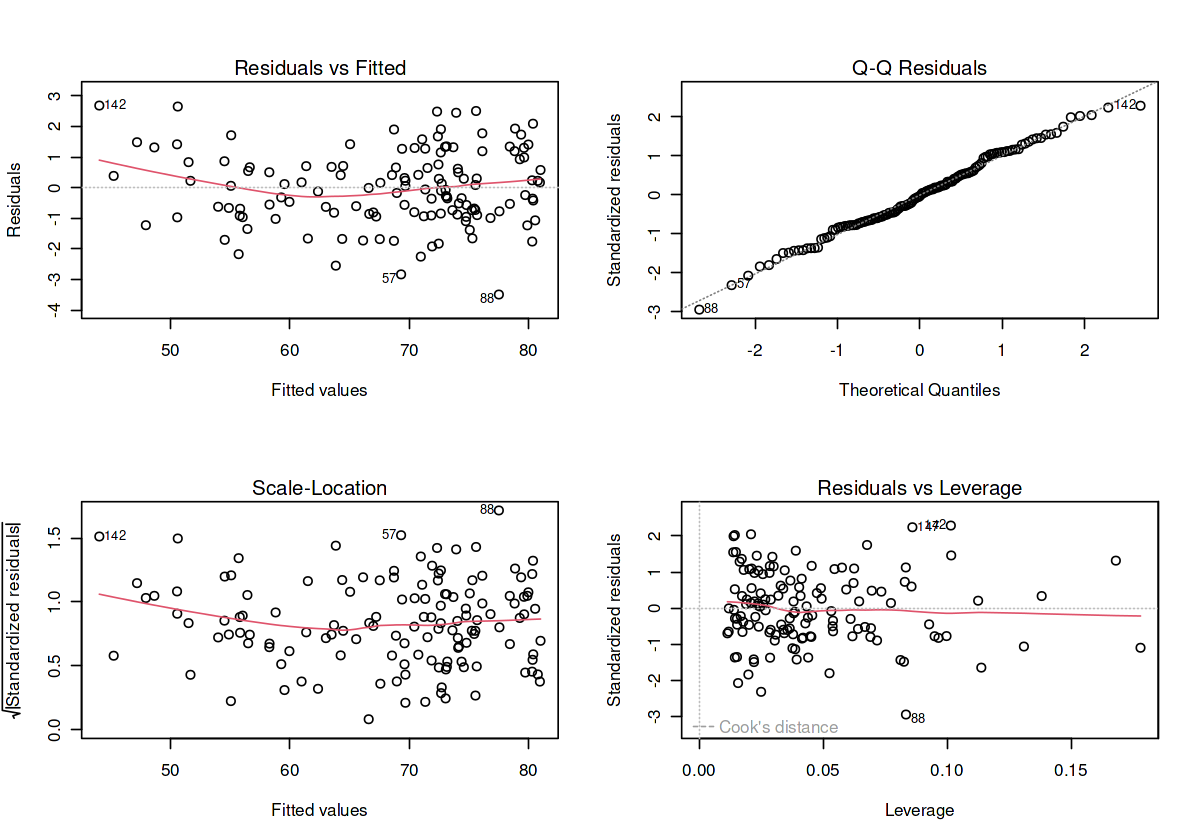

In [49]:
options(repr.plot.width = 10.0, repr.plot.height = 7.0)
par(mfrow=c(2,2))
plot(best_linearmodel)

In [50]:
#homoscedasticity test
car::ncvTest(best_linearmodel)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.08002066, Df = 1, p = 0.77727

In [51]:
#normality test
shapiro.test(best_linearmodel$residuals)


	Shapiro-Wilk normality test

data:  best_linearmodel$residuals
W = 0.9908, p-value = 0.525


In [52]:
#independence test
car::durbinWatsonTest(best_linearmodel)

 lag Autocorrelation D-W Statistic p-value
   1     -0.02686619      2.025464   0.954
 Alternative hypothesis: rho != 0

In [53]:
#Multicollinearity test
car::vif(best_linearmodel)

Under_five_deaths     Adult_mortality Alcohol_consumption                 BMI 
           4.055695            3.122556            1.434007            1.757594 
     GDP_per_capita 
           1.664542

**The residuals in the linear model have normality and satisfy homoscedasticity. Also, There is autocorrelation.**

In [54]:
pred_lm <- predict(best_linearmodel, test)

In [55]:
lm_mse <- mse(test$Life_expectancy , pred_lm)
lm_rmse <- rmse(test$Life_expectancy , pred_lm)
lm_mae <- mae(test$Life_expectancy ,pred_lm)
lm_r2 <- R2(test$Life_expectancy ,pred_lm)

In [56]:
lm_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_mse,lm_rmse ,lm_mae, lm_r2 ))
lm_score

Indicators,Score
<chr>,<dbl>
MSE,1.9254462
RMSE,1.3876045
MAE,1.0311647
R2,0.9781177


## **RandomForest Regression & K FOLD**

In [57]:
ctrl <- trainControl(method = "repeatedcv",
                     repeats = 5,
                     number = 5,
                     verboseIter = TRUE)

rf <- train(Life_expectancy ~ .,
                     data = train,
                     method = "rf",
                     trControl = ctrl)

print(rf)

+ Fold1.Rep1: mtry= 2 
- Fold1.Rep1: mtry= 2 
+ Fold1.Rep1: mtry= 9 
- Fold1.Rep1: mtry= 9 
+ Fold1.Rep1: mtry=17 
- Fold1.Rep1: mtry=17 
+ Fold2.Rep1: mtry= 2 
- Fold2.Rep1: mtry= 2 
+ Fold2.Rep1: mtry= 9 
- Fold2.Rep1: mtry= 9 
+ Fold2.Rep1: mtry=17 
- Fold2.Rep1: mtry=17 
+ Fold3.Rep1: mtry= 2 
- Fold3.Rep1: mtry= 2 
+ Fold3.Rep1: mtry= 9 
- Fold3.Rep1: mtry= 9 
+ Fold3.Rep1: mtry=17 
- Fold3.Rep1: mtry=17 
+ Fold4.Rep1: mtry= 2 
- Fold4.Rep1: mtry= 2 
+ Fold4.Rep1: mtry= 9 
- Fold4.Rep1: mtry= 9 
+ Fold4.Rep1: mtry=17 
- Fold4.Rep1: mtry=17 
+ Fold5.Rep1: mtry= 2 
- Fold5.Rep1: mtry= 2 
+ Fold5.Rep1: mtry= 9 
- Fold5.Rep1: mtry= 9 
+ Fold5.Rep1: mtry=17 
- Fold5.Rep1: mtry=17 
+ Fold1.Rep2: mtry= 2 
- Fold1.Rep2: mtry= 2 
+ Fold1.Rep2: mtry= 9 
- Fold1.Rep2: mtry= 9 
+ Fold1.Rep2: mtry=17 
- Fold1.Rep2: mtry=17 
+ Fold2.Rep2: mtry= 2 
- Fold2.Rep2: mtry= 2 
+ Fold2.Rep2: mtry= 9 
- Fold2.Rep2: mtry= 9 
+ Fold2.Rep2: mtry=17 
- Fold2.Rep2: mtry=17 
+ Fold3.Rep2: mtry= 2 
- Fold3.Rep

Selecting tuning parameters


Fitting mtry = 17 on full training set


Random Forest 

134 samples
 17 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 107, 108, 106, 109, 106, 108, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE    
   2    2.562855  0.9384245  1.90037
   9    1.896463  0.9633485  1.42254
  17    1.857063  0.9647424  1.39867

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 17.


In [58]:
pred_rf <- predict(rf, test)

In [59]:
lm_mse <- mse(test$Life_expectancy , pred_rf)
lm_rmse <- rmse(test$Life_expectancy , pred_rf)
lm_mae <- mae(test$Life_expectancy ,pred_rf)
lm_r2 <- R2(test$Life_expectancy ,pred_rf)

In [60]:
rf_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_mse,lm_rmse ,lm_mae, lm_r2 ))
rf_score

Indicators,Score
<chr>,<dbl>
MSE,2.7530569
RMSE,1.6592338
MAE,1.3204271
R2,0.9665029


# **5. Evaluation**

**Linear Model is the best model. Because, MSE, RMSE values are small.**

-----------

**Thankyou. Please leave your advice in the comments**